In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bank_data = pd.read_csv("bank-additional-full.csv", delimiter=";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# #dataset details
# bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
# # Display basic statistics about numerical features
# print(bank_data.describe())

# # Display the first few rows of the dataset
# print(bank_data.head())

# #Shape of the dataset
# print(bank_data.shape)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [4]:
# # unique values and their counts
# categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# for col in categorical_cols:
#     print(f"\nUnique values and counts for {col}:")
#     print(bank_data[col].value_counts())


Unique values and counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Unique values and counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Unique values and counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Unique values and counts for default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Unique values and counts for housing:
housing
yes        21576
no         18622


In [5]:
# #Data Preprocessing
# #finding missing values
# missing_val = [features for features in bank_data.columns if bank_data[features].isnull().sum() > 0]
# for feature in missing_val:
#     print(feature, np.round(bank_data[feature].isnull().mean(), 4),  ' % missing values')
# else:
#     print("No missing value found")

No missing value found


In [6]:
# #identifying categorical features

# categorical_feature =[feature for feature in bank_data.columns if ((bank_data[feature].dtypes=='O') & (feature not in ['deposit']))]
# print("Categorival features are: ","\n" ,categorical_feature)

Categorival features are:  
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [7]:
# #Categories of categorical features
# for feature in categorical_feature:
#     print('feature {} has {} categories '.format(feature,len(bank_data[feature].unique())))

feature job has 12 categories 
feature marital has 4 categories 
feature education has 8 categories 
feature default has 3 categories 
feature housing has 3 categories 
feature loan has 3 categories 
feature contact has 2 categories 
feature month has 10 categories 
feature day_of_week has 5 categories 
feature poutcome has 3 categories 
feature y has 2 categories 


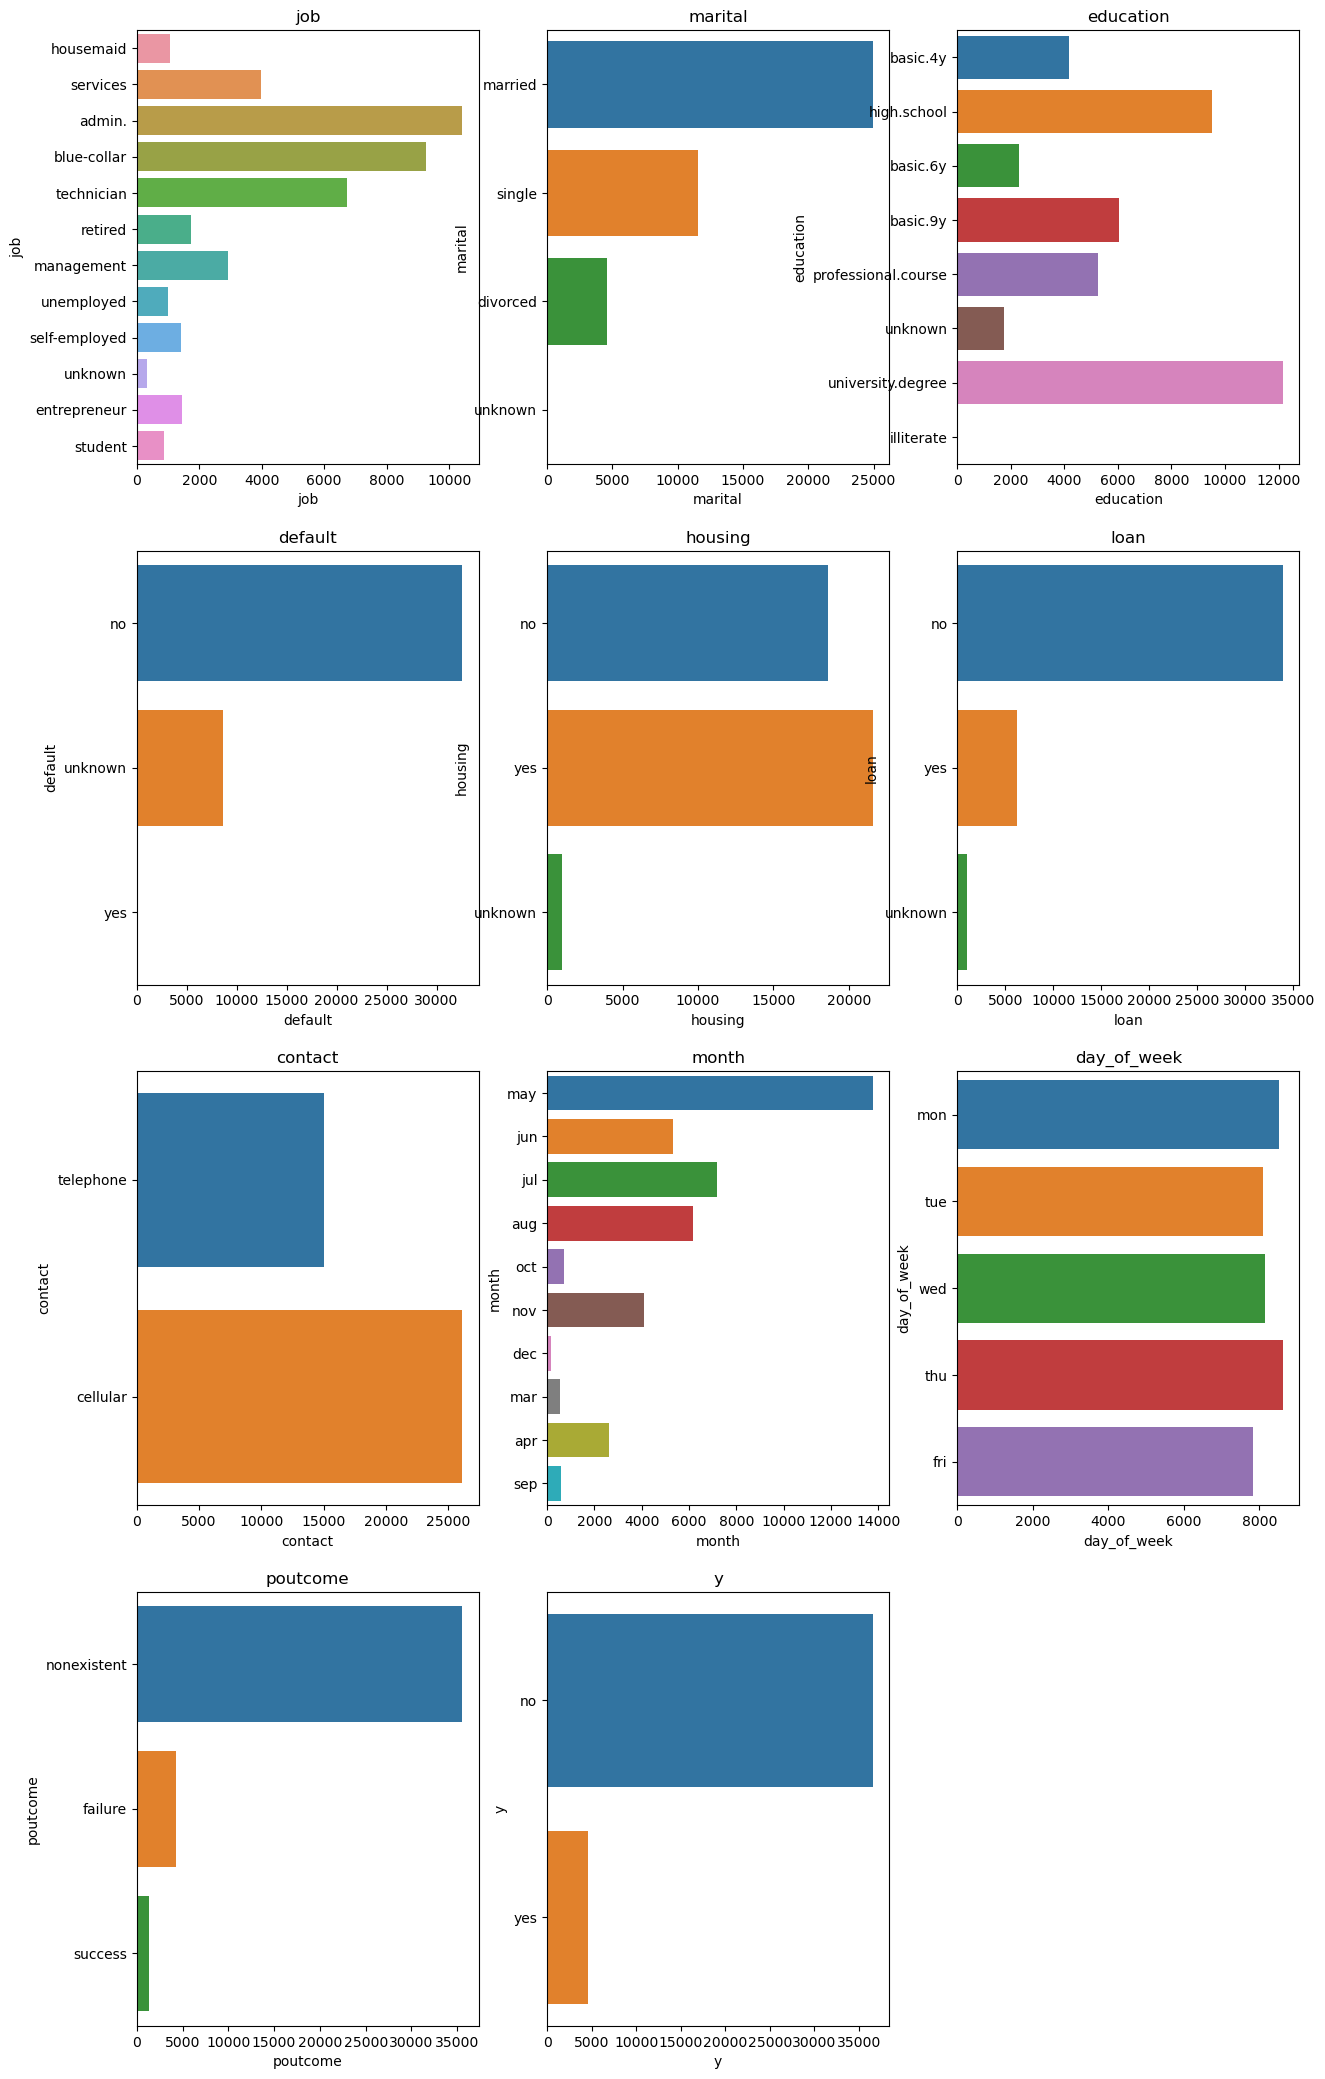

In [8]:
# #distribution of categorical features 
# plt.figure(figsize=(15,80), facecolor='white')
# plotnumber =1
# for feature in categorical_feature:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.countplot(y=feature,data=bank_data)
#     plt.xlabel(feature)
#     plt.title(feature)
#     plotnumber+=1
# plt.show()

/Users/prachib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/prachib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/prachib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/prachib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/prachib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/prachib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has change

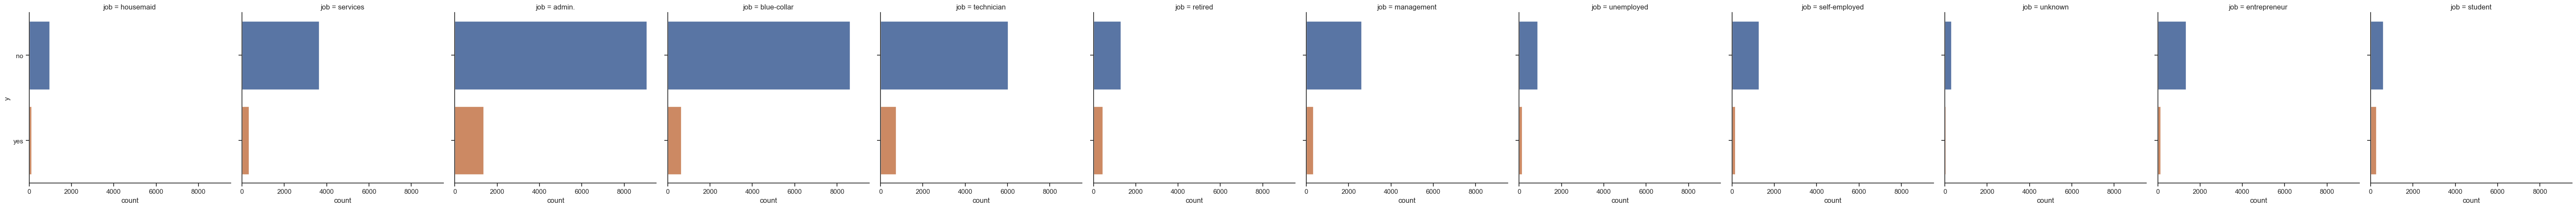

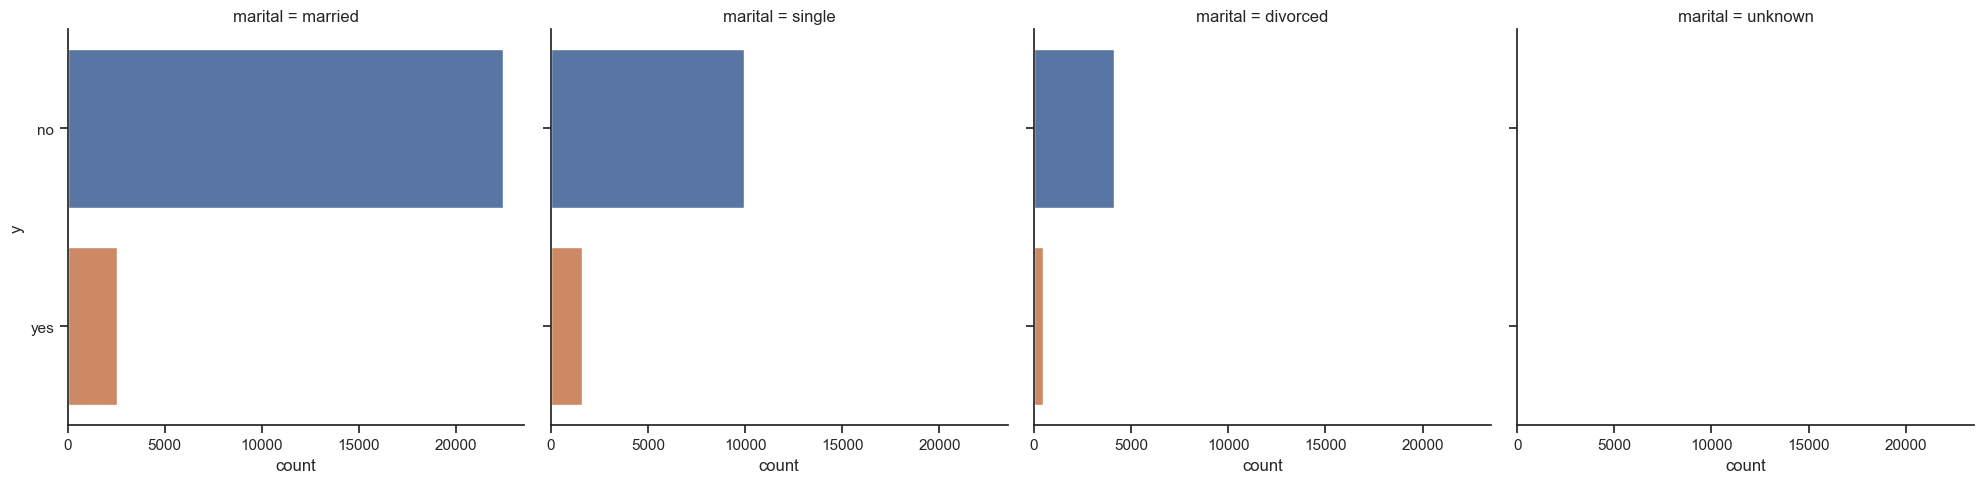

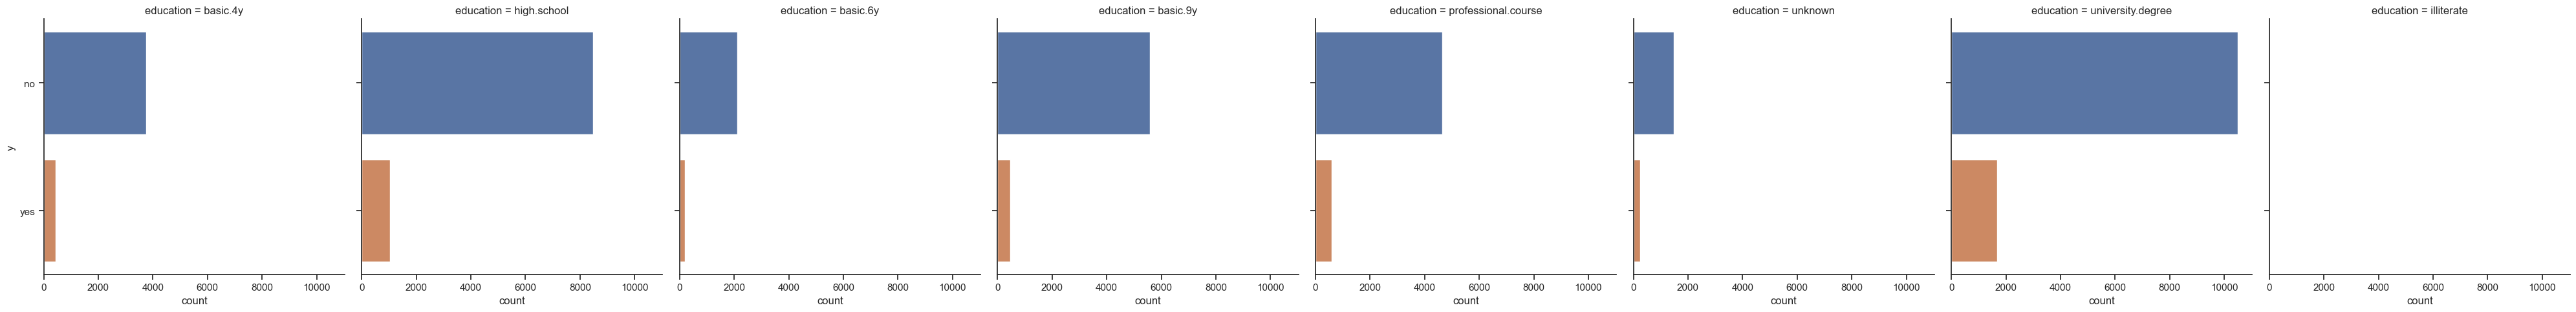

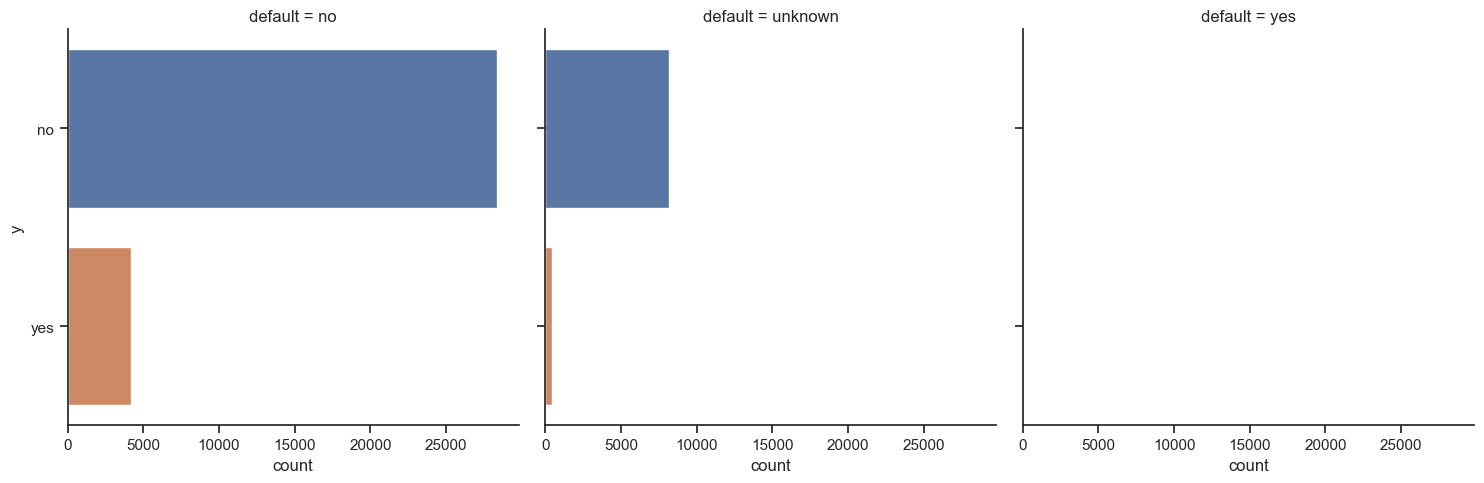

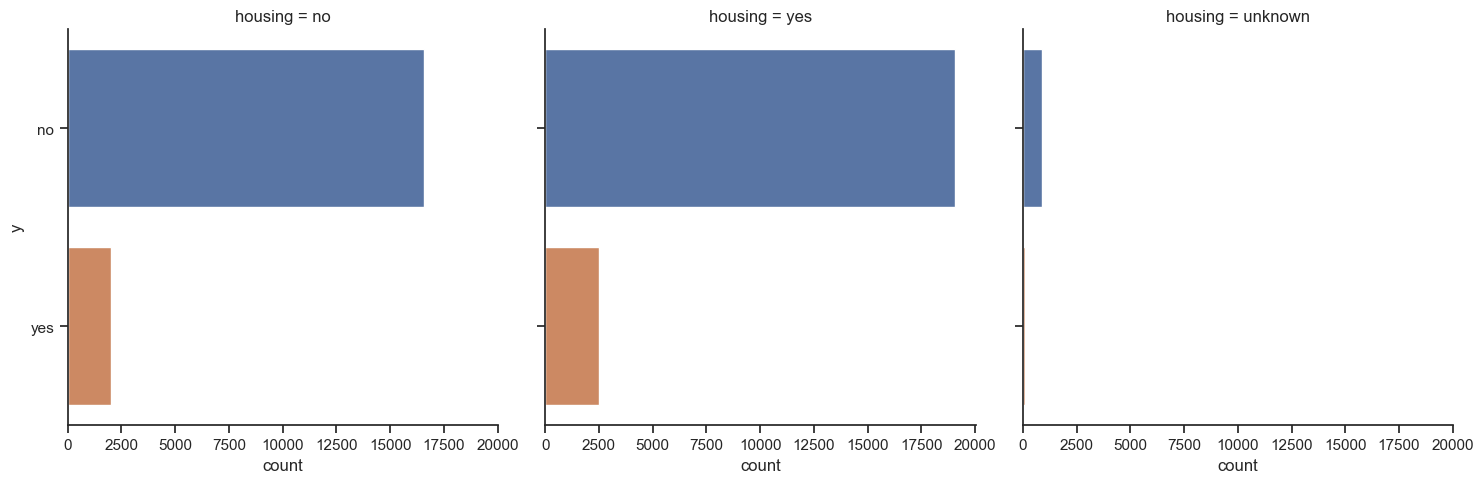

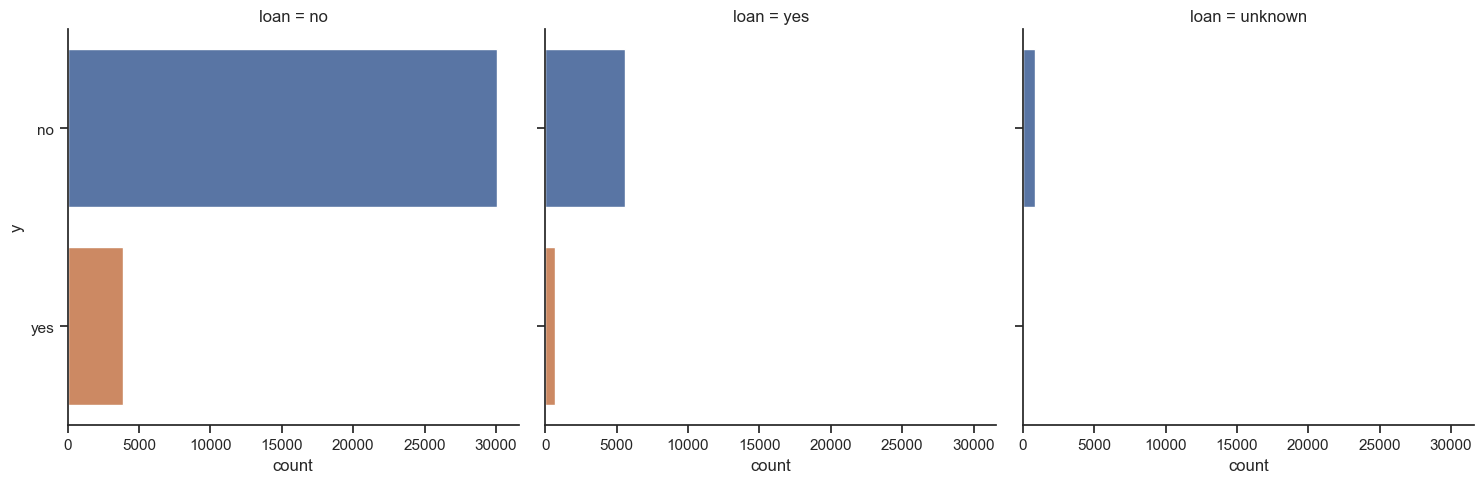

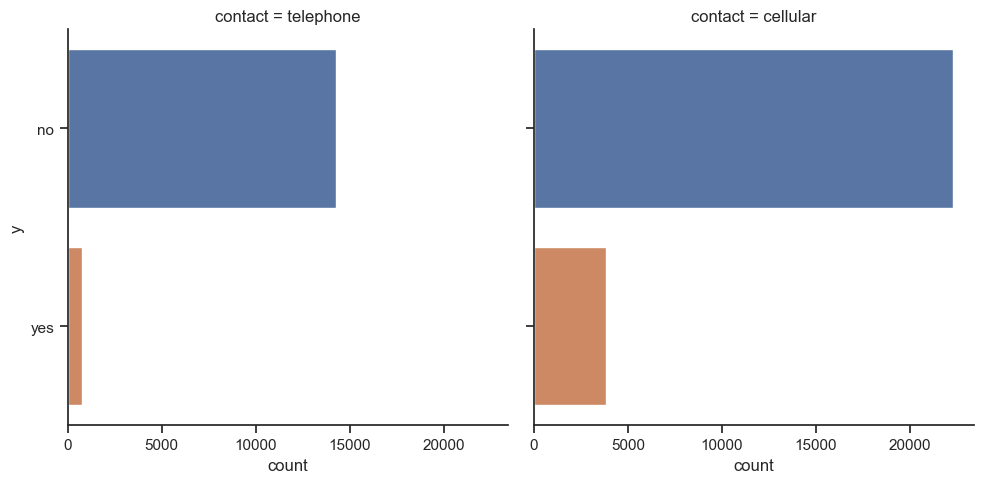

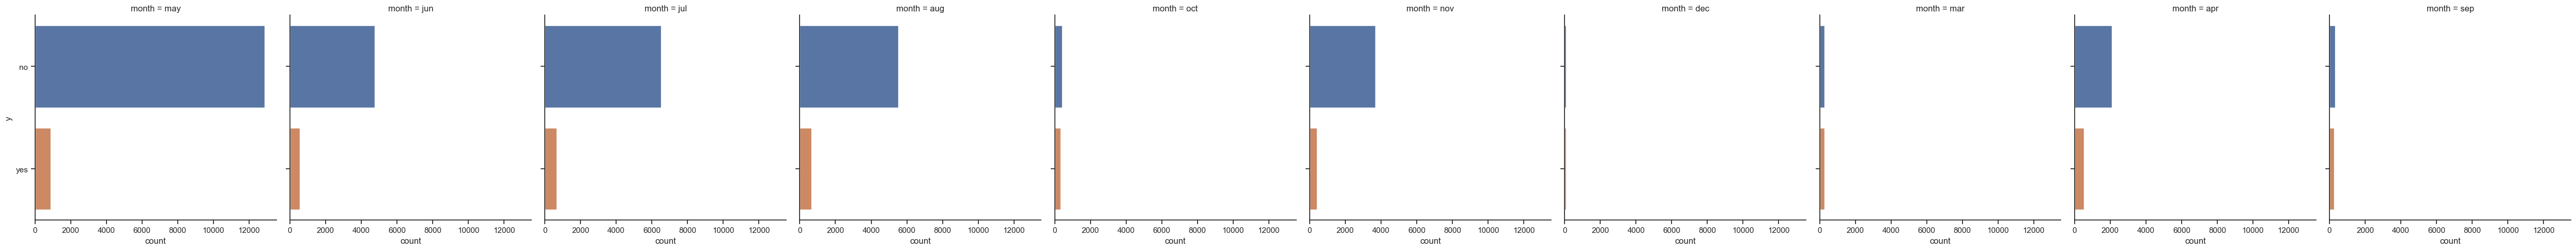

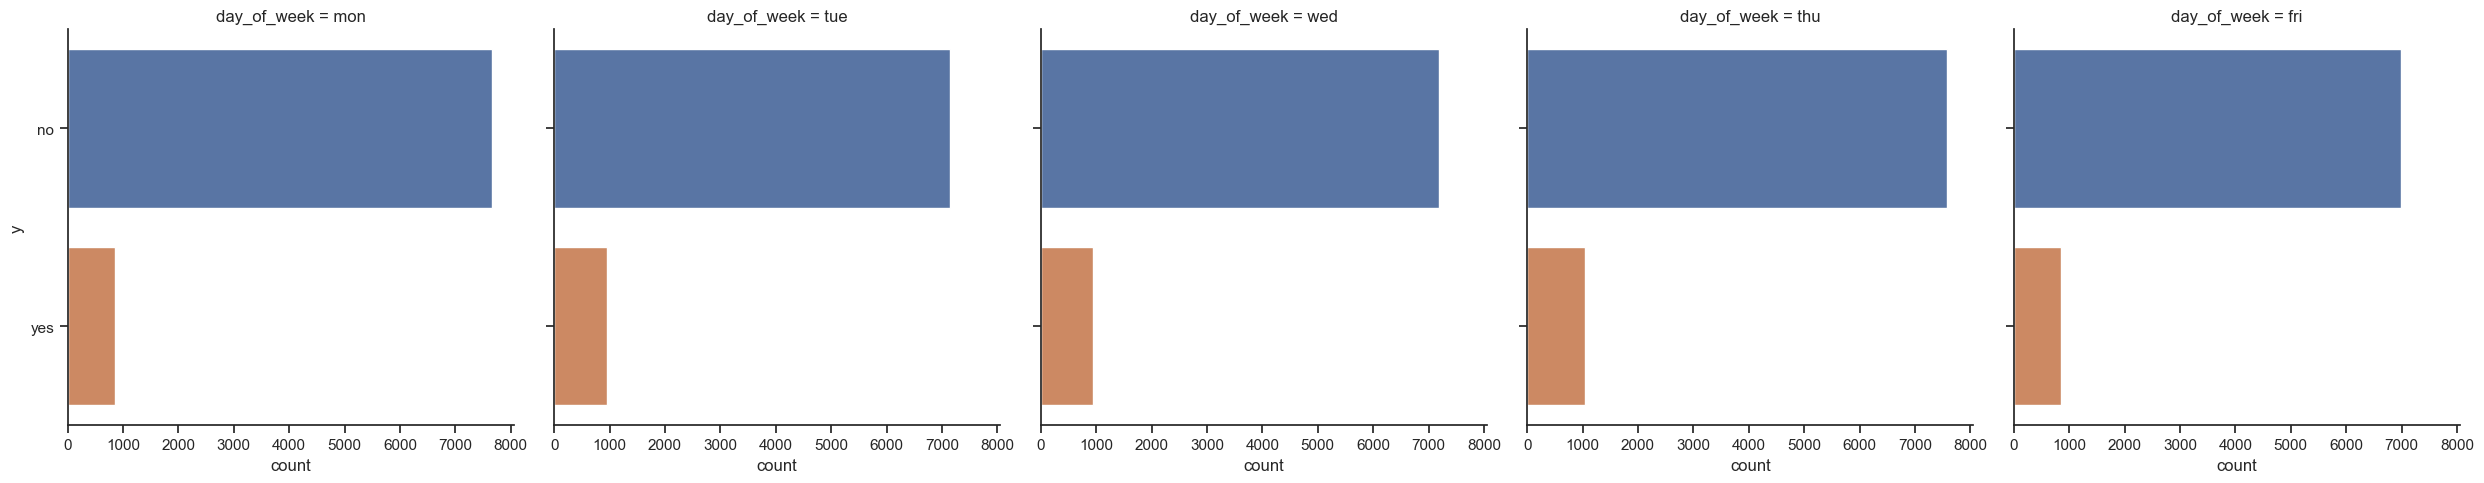

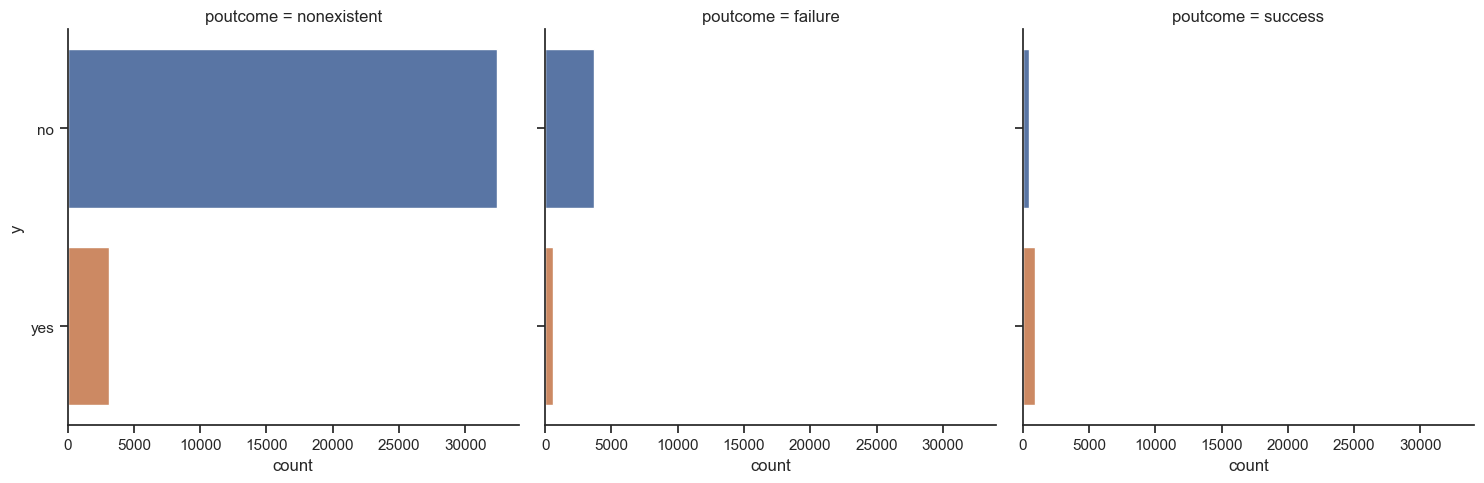

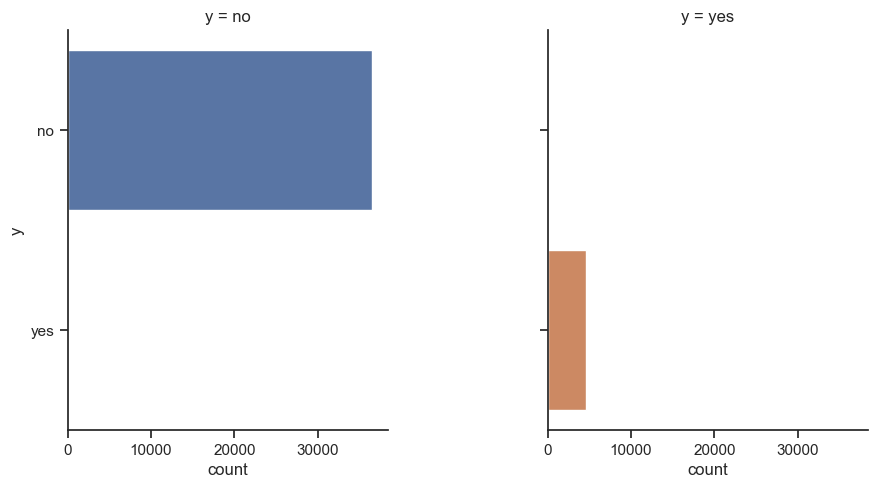

In [9]:
# #Distribution of categorical fetures over target variable
# sns.set(style="ticks")

# for feature in categorical_feature:
#     sns.catplot(y='y', col=feature, kind='count', data=bank_data)
    
# # Adjust layout parameters manually
# plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

# plt.show()

In [10]:
# #count of target label over categorical features 
# for feature in categorical_feature:
#     print(bank_data.groupby(['y',feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

In [11]:
# #Identifying numerical features
# numerical_features = [feature for feature in bank_data.columns if ((bank_data[feature].dtypes != 'O') & (feature not in ['y']))]
# print('Number of numerical variables: ', len(numerical_features))
# print(bank_data[numerical_features].head())

Number of numerical variables:  10
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0  


In [12]:
# discrete_feature=[feature for feature in numerical_features if len(bank_data[feature].unique())<25]
# print("Discrete Variables Count: {}".format(len(discrete_feature)))
# #continuous numerical features
# continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
# print("Continuous feature Count {}".format(len(continuous_features)))

Discrete Variables Count: 3
Continuous feature Count 7


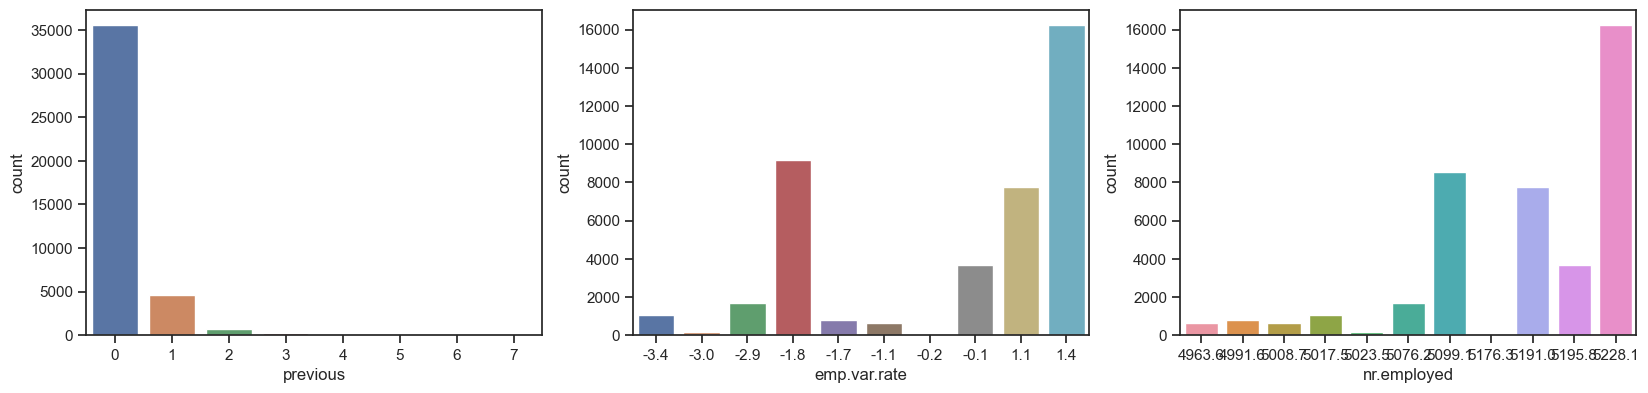

In [13]:
# plt.figure(figsize=(20, 60), facecolor='white')
# plotnumber = 1
# for discrete_feature in discrete_feature:
#     ax = plt.subplot(12, 3, plotnumber)
#     sns.countplot(x=discrete_feature, data=bank_data)
#     plt.xlabel(discrete_feature)
#     plotnumber += 1
# plt.show()


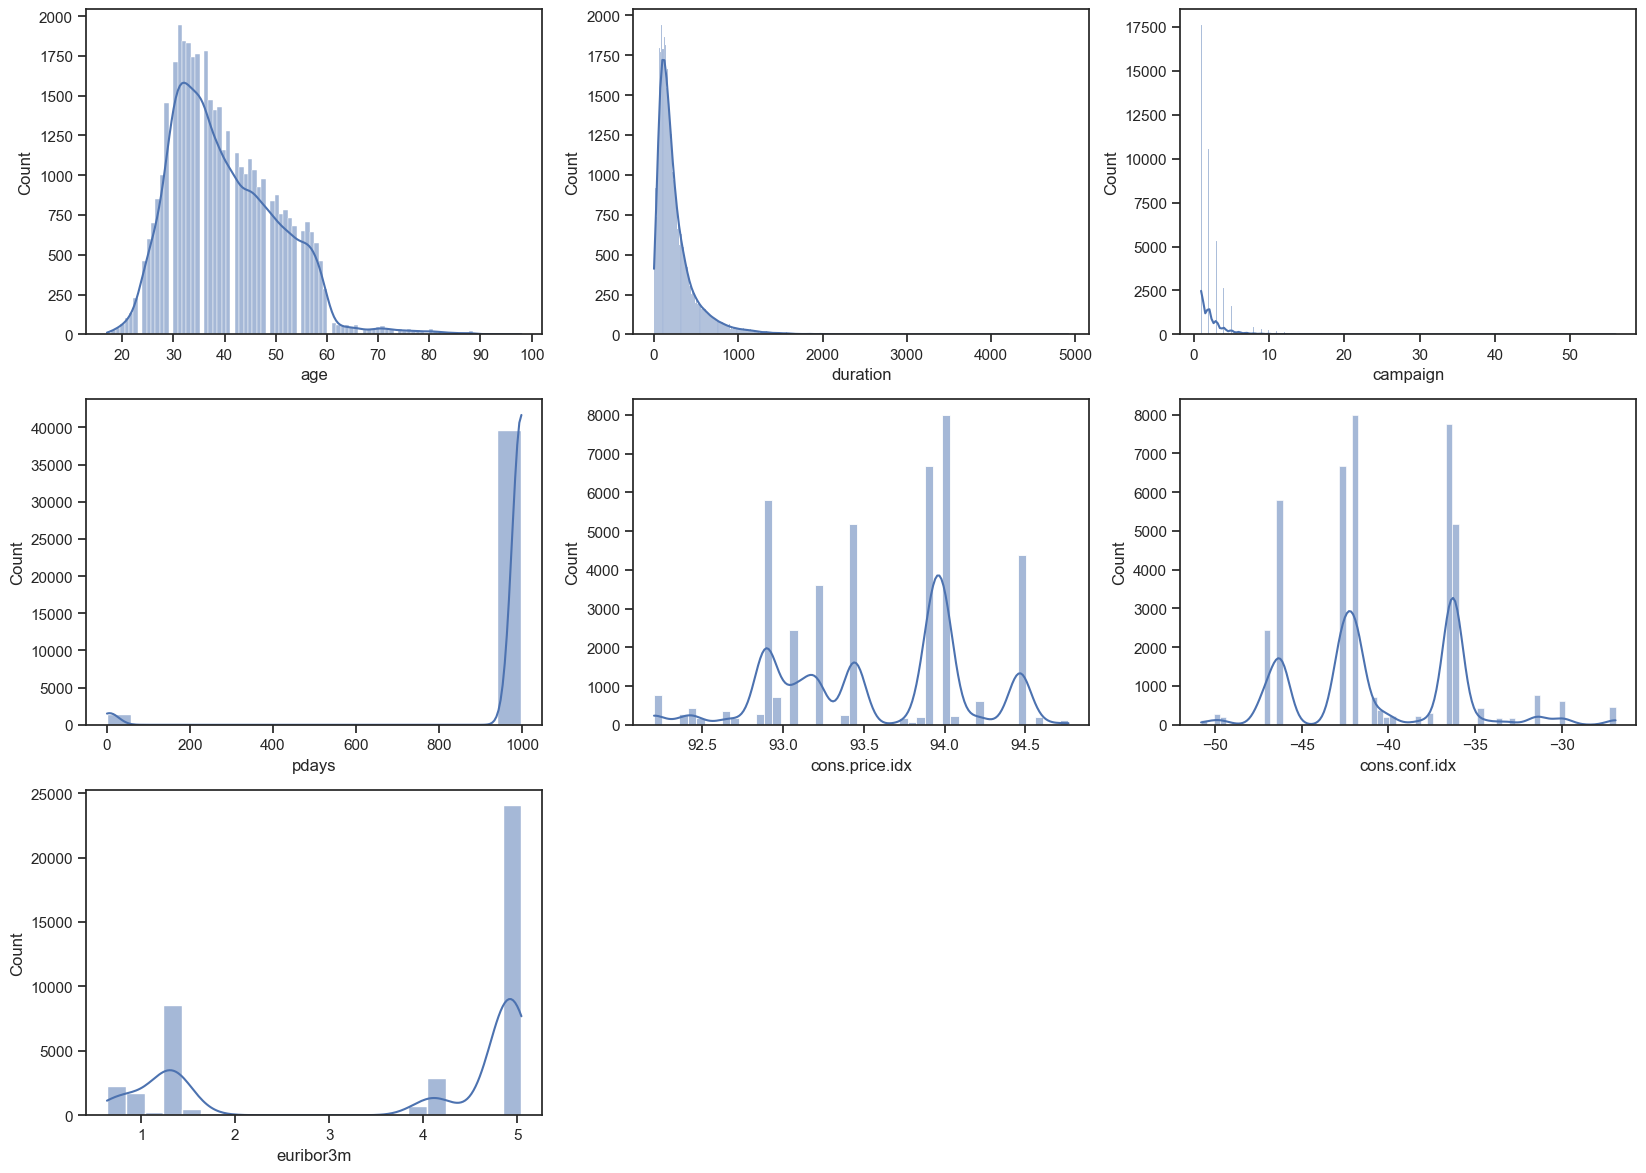

In [14]:
# #plot a univariate distribution of continues observations
# plt.figure(figsize=(20,60), facecolor='white')
# plotnumber =1
# for continuous_feature in continuous_features:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.histplot(bank_data[continuous_feature], kde = True)
#     plt.xlabel(continuous_feature)
#     plotnumber+=1
# plt.show()

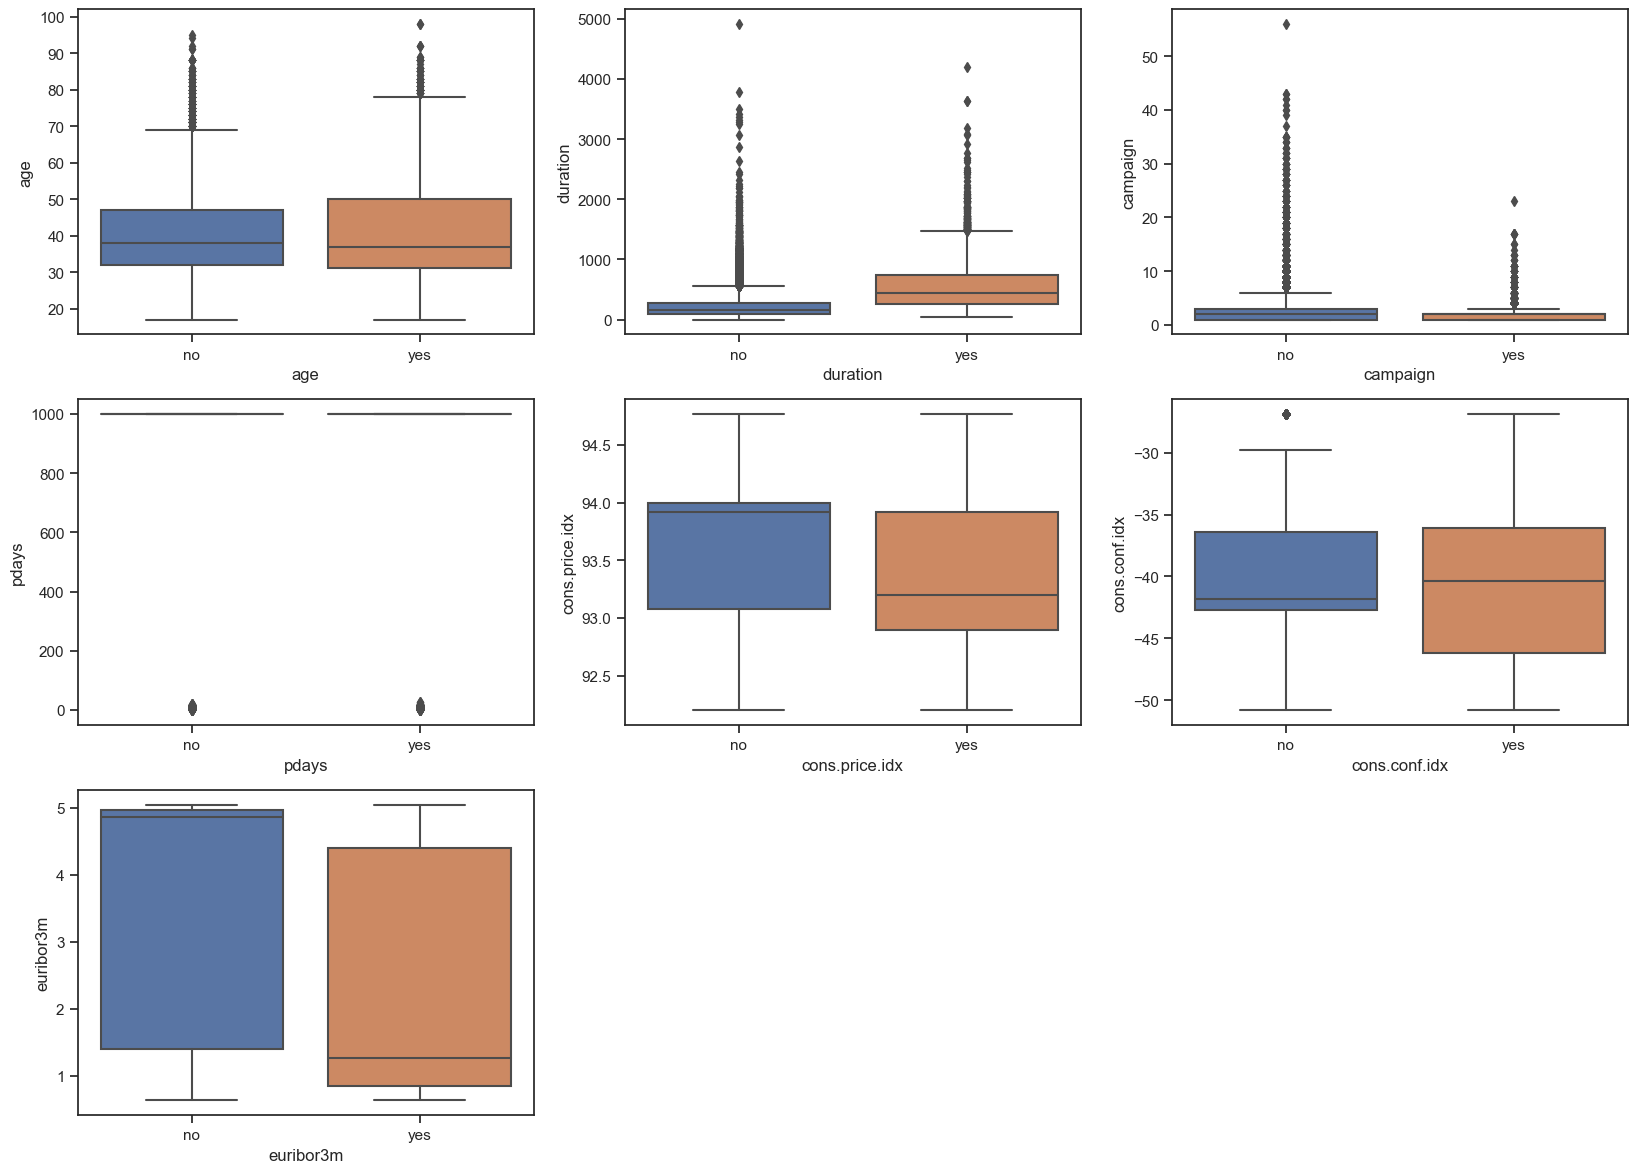

In [15]:
# #Relation between target variable and numerical fetures
# plt.figure(figsize=(20,60), facecolor='white')
# plotnumber =1
# for feature in continuous_features:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.boxplot(x="y", y= bank_data[feature], data=bank_data)
#     plt.xlabel(feature)
#     plotnumber+=1
# plt.show()

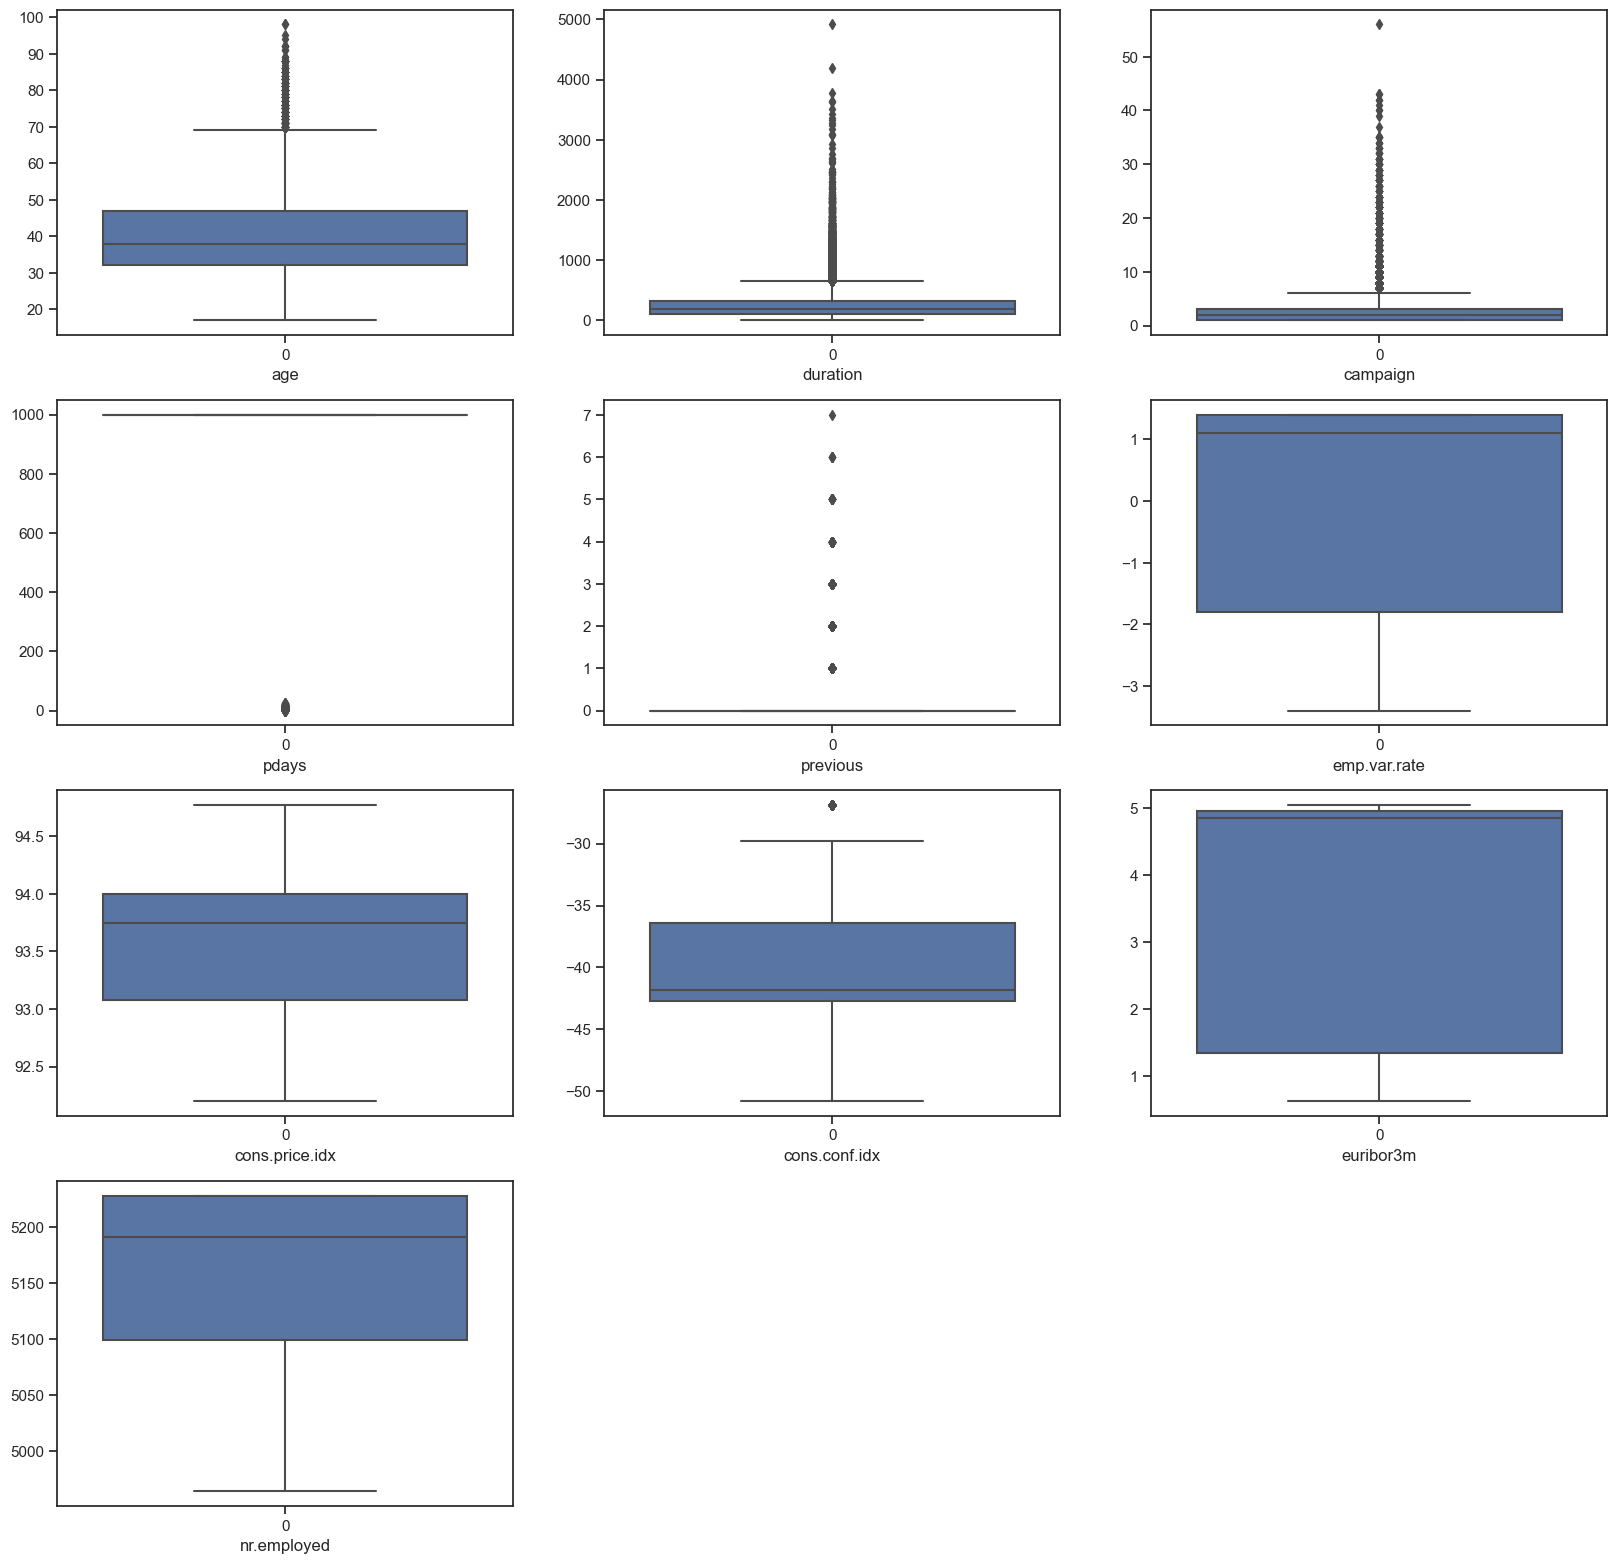

In [16]:
# #identifying outliers y boxplot on numerical features  
# plt.figure(figsize=(20,60), facecolor='white')
# plotnumber =1
# for numerical_feature in numerical_features:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.boxplot(bank_data[numerical_feature])
#     plt.xlabel(numerical_feature)
#     plotnumber+=1
# plt.show()

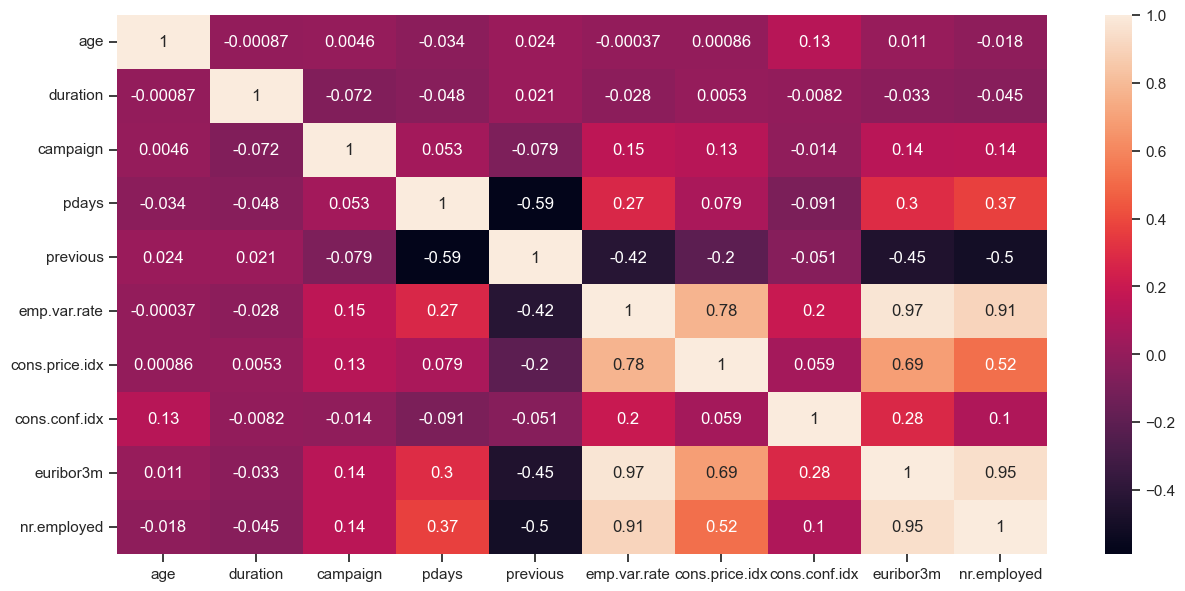

In [17]:
# ## Checking for correlation
# cor_mat = bank_data[numerical_features].corr()
# fig = plt.figure(figsize=(15, 7))
# heatmap = sns.heatmap(cor_mat, annot=True)

# # Rotate y-axis tick labels for better readability
# plt.yticks(rotation=0)

# plt.show()


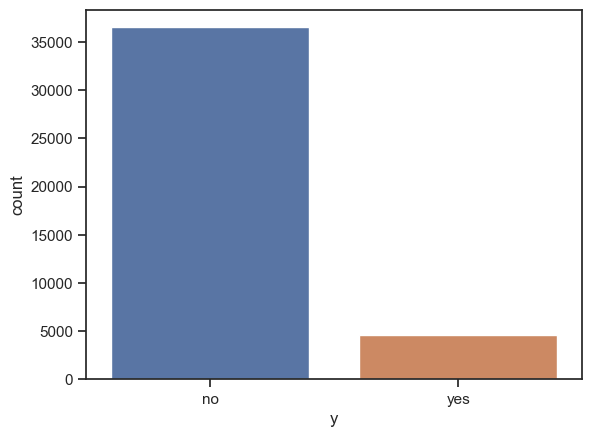

Percentage of 'yes': 11.27%
Percentage of 'no': 88.73%


In [18]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming bank_data is your DataFrame
# percentage_counts = bank_data['y'].value_counts(normalize=True) * 100

# # Plot countplot
# sns.countplot(x='y', data=bank_data)
# plt.show()

# # Print percentage of 'yes' and 'no'
# print("Percentage of 'yes': {:.2f}%".format(percentage_counts['yes']))
# print("Percentage of 'no': {:.2f}%".format(percentage_counts['no']))


In [19]:
# imbalance_ratio = bank_data['y'].value_counts(normalize=True)
# print("Imbalance Ratio:")
# print(imbalance_ratio)

Imbalance Ratio:
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [103]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
# Load the Bank Marketing dataset
bank_data = pd.read_csv("bank-additional-full.csv", delimiter=";")

# Data Preprocessing
# Drop irrelevant columns
bank_data = bank_data.drop(['day_of_week', 'duration', 'campaign', 'pdays', 'previous'], axis=1)

# Encoding categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    bank_data[col] = label_encoders[col].fit_transform(bank_data[col])

# Spliting features (X) and target variable (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Spliting the dataset in training and testing sets
# Splitting the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [104]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Define the MLP model
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, output_size)
    
#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Load the Bank Marketing dataset
# bank_data = pd.read_csv("bank-additional-full.csv", delimiter=";")

# # Data Preprocessing
# # Drop irrelevant columns
# bank_data = bank_data.drop(['day_of_week', 'duration', 'campaign', 'pdays', 'previous'], axis=1)

# # Encoding categorical variables
# categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# label_encoders = {}
# for col in categorical_cols:
#     label_encoders[col] = LabelEncoder()
#     bank_data[col] = label_encoders[col].fit_transform(bank_data[col])

# # Split features (X) and target variable (y)
# X = bank_data.drop('y', axis=1)
# y = bank_data['y']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test) 

# # Label encoding the target variable
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# # Initialize the model, loss function, and optimizer
# input_size = X_train.shape[1]
# output_size = len(label_encoder.classes_)  # Number of unique classes

# # Define hyperparameters to experiment with
# hyperparameters = {
#     'hidden_size': [64, 128, 256],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'num_epochs': [10, 20, 30],
#     'batch_size': [32, 64, 128]
# }

# best_accuracy = 0
# best_hyperparameters = {}

# # Train models with different hyperparameter values
# for hidden_size in hyperparameters['hidden_size']:
#     for learning_rate in hyperparameters['learning_rate']:
#         for num_epochs in hyperparameters['num_epochs']:
#             for batch_size in hyperparameters['batch_size']:
#                 # Initialize the model, loss function, and optimizer
#                 mlp_model = MLP(input_size, hidden_size, output_size)
#                 criterion = nn.CrossEntropyLoss()
#                 optimizer = optim.Adam(mlp_model.parameters(), lr=learning_rate)
                
#                 # Train the model
#                 for epoch in range(num_epochs):
#                     mlp_model.train()
#                     optimizer.zero_grad()
#                     outputs = mlp_model(X_train_tensor)
#                     loss = criterion(outputs, y_train_tensor)
#                     loss.backward()
#                     optimizer.step()
                
#                 # Evaluate the model
#                 mlp_model.eval()
#                 with torch.no_grad():
#                     outputs = mlp_model(X_test_tensor)
#                     _, predicted = torch.max(outputs, 1)
#                     accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
                
#                 # Update best accuracy and hyperparameters if current model is better
#                 if accuracy > best_accuracy:
#                     best_accuracy = accuracy
#                     best_hyperparameters = {
#                         'hidden_size': hidden_size,
#                         'learning_rate': learning_rate,
#                         'num_epochs': num_epochs,
#                         'batch_size': batch_size
#                     }

# # Display best hyperparameters and accuracy
# print("Best Hyperparameters:")
# print(best_hyperparameters)
# print("Best Accuracy:", best_accuracy)


# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Define hyperparameters to experiment with
# hyperparameters = {
#     'C': [0.1, 1, 10],  # Regularization parameter
#     'kernel': ['poly'],  # Kernel type
#     'gamma': ['scale', 'auto'],  # Kernel coefficient
# }

# best_accuracy = 0
# best_hyperparameters = {}

# # Train models with different hyperparameter values
# for C in hyperparameters['C']:
#     for kernel in hyperparameters['kernel']:
#         for gamma in hyperparameters['gamma']:
#             # Initialize the SVM model
#             svm_model = SVC(C=C, kernel=kernel, gamma=gamma)
            
#             # Train the model
#             svm_model.fit(X_train_scaled, y_train)
            
#             # Evaluate the model
#             y_pred = svm_model.predict(X_test_scaled)
#             accuracy = accuracy_score(y_test, y_pred)
            
#             # Update best accuracy and hyperparameters if current model is better
#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_hyperparameters = {
#                     'C': C,
#                     'kernel': kernel,
#                     'gamma': gamma
#                 }

# # Display best hyperparameters and accuracy
# print("Best Hyperparameters:")
# print(best_hyperparameters)
# print("Best Accuracy:", best_accuracy)


Best Hyperparameters:
{'hidden_size': 256, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 128}
Best Accuracy: 0.8977907259043457



Evaluation Metrics for SVM Model:
Training Accuracy: 0.8949317147192716
Test Accuracy: 0.8939062879339645
Training Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     29245
         yes       0.64      0.15      0.24      3705

    accuracy                           0.89     32950
   macro avg       0.77      0.57      0.59     32950
weighted avg       0.87      0.89      0.86     32950

Test Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7303
         yes       0.65      0.14      0.23       935

    accuracy                           0.89      8238
   macro avg       0.77      0.57      0.59      8238
weighted avg       0.87      0.89      0.86      8238



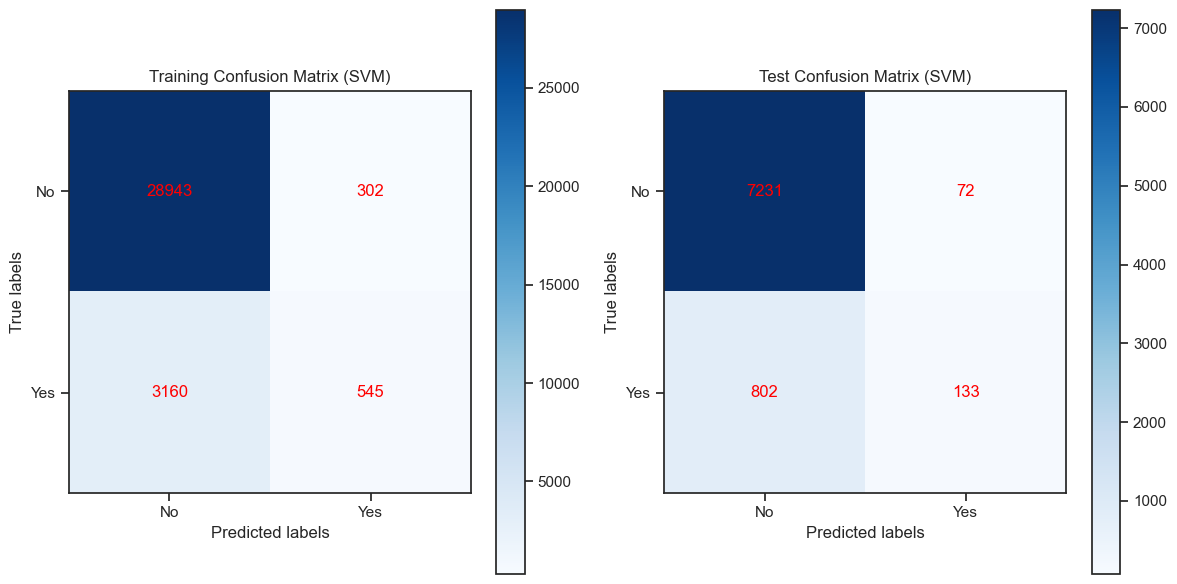

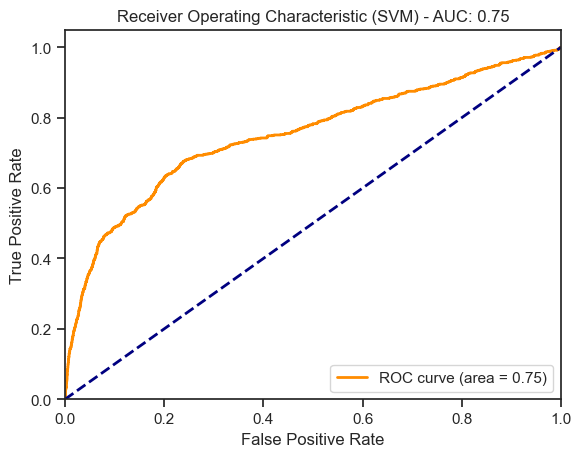

In [44]:
# from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc
# import matplotlib.pyplot as plt

# #SVM model
# svm_model = SVC(kernel='linear')

# # Train the SVM model
# svm_model.fit(X_train, y_train)

# # Predictions for SVM model
# y_train_pred_svm = svm_model.predict(X_train)
# y_test_pred_svm = svm_model.predict(X_test)

# # Evaluate the SVM model
# train_accuracy = svm_model.score(X_train, y_train)
# test_accuracy = svm_model.score(X_test, y_test)

# # Print evaluation metrics for SVM model
# print("\nEvaluation Metrics for SVM Model:")
# print(f'Training Accuracy: {train_accuracy}')
# print(f'Test Accuracy: {test_accuracy}')
# print("Training Classification Report:")
# print(classification_report(y_train, y_train_pred_svm))
# print("Test Classification Report:")
# print(classification_report(y_test, y_test_pred_svm))

# # Confusion matrix for SVM model
# train_cm_svm = confusion_matrix(y_train, y_train_pred_svm)
# test_cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# # Plot confusion matrix for SVM model
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Training Confusion Matrix (SVM)")
# plt.imshow(train_cm_svm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(train_cm_svm.shape[0]):
#     for j in range(train_cm_svm.shape[1]):
#         plt.text(j, i, train_cm_svm[i, j], ha='center', va='center', color='red')

# plt.subplot(1, 2, 2)
# plt.title("Test Confusion Matrix (SVM)")
# plt.imshow(test_cm_svm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(test_cm_svm.shape[0]):
#     for j in range(test_cm_svm.shape[1]):
#         plt.text(j, i, test_cm_svm[i, j], ha='center', va='center', color='red')

# plt.tight_layout()
# plt.show()

# # Predict probabilities for SVM model
# y_train_prob_svm = svm_model.decision_function(X_train)
# y_test_prob_svm = svm_model.decision_function(X_test)
# # Map categorical labels to binary labels
# y_test_binary = y_test.replace({'no': 0, 'yes': 1})

# # Compute ROC curve and ROC area for SVM model
# fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binary, y_test_prob_svm)
# roc_auc_svm = auc(fpr_svm, tpr_svm)

# # Plot ROC curve for SVM model
# plt.figure()
# plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title(f'Receiver Operating Characteristic (SVM) - AUC: {roc_auc_svm:.2f}')
# plt.legend(loc="lower right")
# plt.show()


Training Accuracy: 0.8997875569044006
Test Accuracy: 0.8969410050983249
Training Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     29245
         yes       0.71      0.18      0.29      3705

    accuracy                           0.90     32950
   macro avg       0.81      0.59      0.62     32950
weighted avg       0.88      0.90      0.87     32950

Test Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7303
         yes       0.67      0.18      0.28       935

    accuracy                           0.90      8238
   macro avg       0.79      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



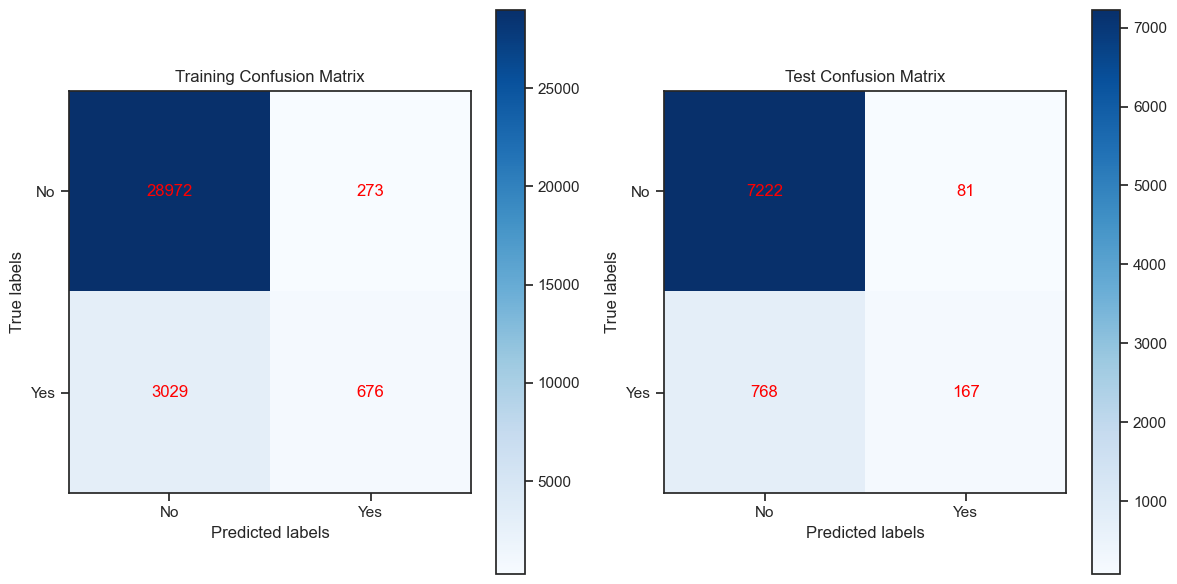

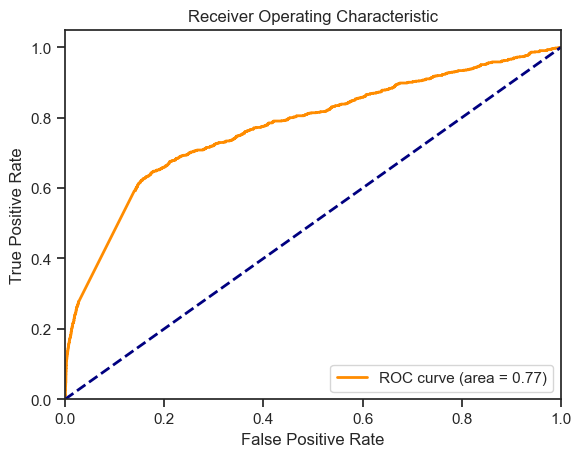

In [106]:
# # Best hyperparameters
# best_hyperparameters = {'hidden_size': 256, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 128}

# # Define the model with best hyperparameters
# input_size = X_train.shape[1]
# hidden_size = best_hyperparameters['hidden_size']
# output_size = len(label_encoder.classes_)
# mlp_model = MLP(input_size, hidden_size, output_size)

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(mlp_model.parameters(), lr=best_hyperparameters['learning_rate'])

# # Train the model with best hyperparameters
# num_epochs = best_hyperparameters['num_epochs']
# batch_size = best_hyperparameters['batch_size']
# for epoch in range(num_epochs):
#     for i in range(0, len(X_train_tensor), batch_size):
#         optimizer.zero_grad()
#         batch_X = X_train_tensor[i:i+batch_size]
#         batch_y = y_train_tensor[i:i+batch_size]
#         outputs = mlp_model(batch_X)
#         loss = criterion(outputs, batch_y)
#         loss.backward()
#         optimizer.step()

# # Evaluate the model
# with torch.no_grad():
#     train_outputs = mlp_model(X_train_tensor)
#     test_outputs = mlp_model(X_test_tensor)
#     train_predictions = torch.argmax(train_outputs, dim=1)
#     test_predictions = torch.argmax(test_outputs, dim=1)

# # Convert predictions back to original labels
# train_pred_labels = label_encoder.inverse_transform(train_predictions.numpy())
# test_pred_labels = label_encoder.inverse_transform(test_predictions.numpy())

# # Calculate accuracy
# train_accuracy = np.mean(y_train == train_pred_labels)
# test_accuracy = np.mean(y_test == test_pred_labels)

# print(f'Training Accuracy: {train_accuracy}')
# print(f'Test Accuracy: {test_accuracy}')

# # Print evaluation metrics
# print("Training Classification Report:")
# print(classification_report(y_train, train_pred_labels))
# print("Test Classification Report:")
# print(classification_report(y_test, test_pred_labels))

# # Confusion matrix
# train_cm = confusion_matrix(y_train, train_pred_labels)
# test_cm = confusion_matrix(y_test, test_pred_labels)

# # Plot confusion matrix
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Training Confusion Matrix")
# plt.imshow(train_cm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(train_cm.shape[0]):
#     for j in range(train_cm.shape[1]):
#         plt.text(j, i, train_cm[i, j], ha='center', va='center', color='red')

# plt.subplot(1, 2, 2)
# plt.title("Test Confusion Matrix")
# plt.imshow(test_cm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(test_cm.shape[0]):
#     for j in range(test_cm.shape[1]):
#         plt.text(j, i, test_cm[i, j], ha='center', va='center', color='red')

# plt.tight_layout()
# plt.show()

# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test_encoded, test_outputs[:, 1])
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [107]:
# Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



Evaluation Metrics for SVM Model:
Training Accuracy: 0.9010318664643399
Test Accuracy: 0.8969410050983249
Training Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     29245
         yes       0.69      0.22      0.33      3705

    accuracy                           0.90     32950
   macro avg       0.80      0.60      0.64     32950
weighted avg       0.88      0.90      0.88     32950

Test Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.94      7303
         yes       0.65      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



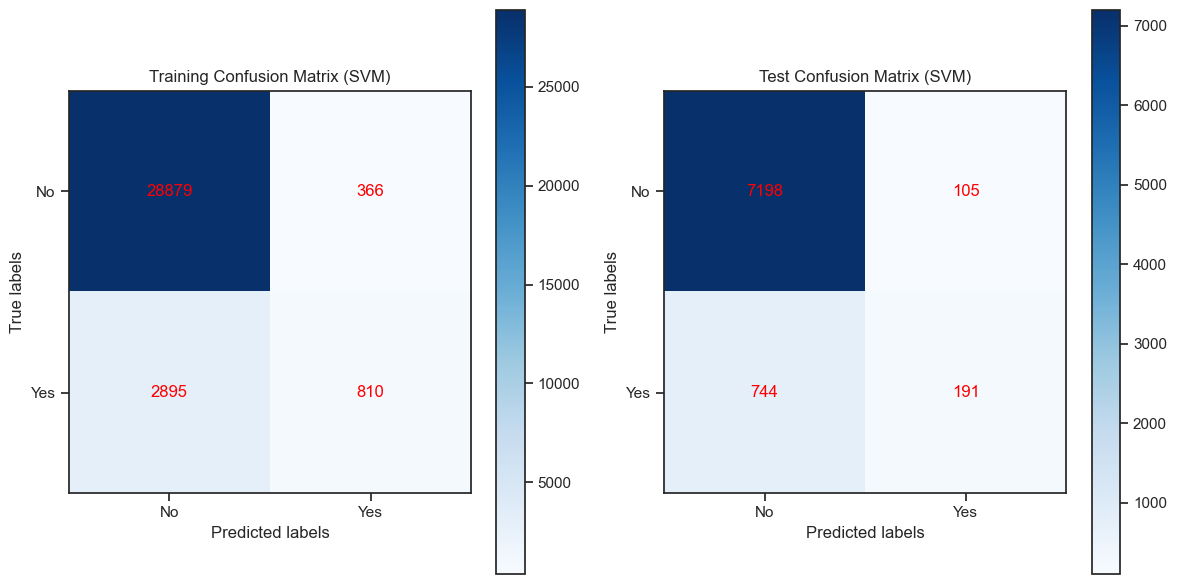

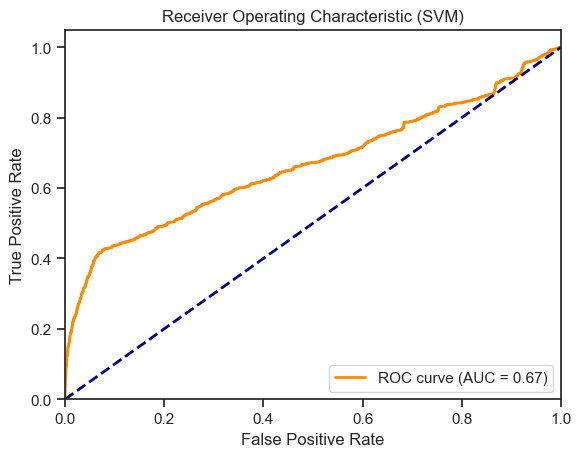

In [54]:
# # SVM model
# svm_model = SVC(kernel='linear')

# # Train the SVM model
# svm_model.fit(X_train_normalized, y_train)

# # Predictions for SVM model
# y_train_pred_svm = svm_model.predict(X_train_normalized)
# y_test_pred_svm = svm_model.predict(X_test_normalized)

# # Evaluate the SVM model
# train_accuracy = svm_model.score(X_train_normalized, y_train)
# test_accuracy = svm_model.score(X_test_normalized, y_test)

# # Print evaluation metrics for SVM model
# print("\nEvaluation Metrics for SVM Model:")
# print(f'Training Accuracy: {train_accuracy}')
# print(f'Test Accuracy: {test_accuracy}')
# print("Training Classification Report:")
# print(classification_report(y_train, y_train_pred_svm))
# print("Test Classification Report:")
# print(classification_report(y_test, y_test_pred_svm))

# # Confusion matrix for SVM model
# train_cm_svm = confusion_matrix(y_train, y_train_pred_svm)
# test_cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# # Plot confusion matrix for SVM model
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Training Confusion Matrix (SVM)")
# plt.imshow(train_cm_svm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(train_cm_svm.shape[0]):
#     for j in range(train_cm_svm.shape[1]):
#         plt.text(j, i, train_cm_svm[i, j], ha='center', va='center', color='red')

# plt.subplot(1, 2, 2)
# plt.title("Test Confusion Matrix (SVM)")
# plt.imshow(test_cm_svm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(test_cm_svm.shape[0]):
#     for j in range(test_cm_svm.shape[1]):
#         plt.text(j, i, test_cm_svm[i, j], ha='center', va='center', color='red')

# plt.tight_layout()
# plt.show()

# # Predict probabilities for SVM model
# y_train_prob_svm = svm_model.decision_function(X_train_normalized)
# y_test_prob_svm = svm_model.decision_function(X_test_normalized)

# # Map categorical labels to binary labels
# y_test_binary = y_test.replace({'no': 0, 'yes': 1})

# # Compute ROC curve and ROC area for SVM model
# fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binary, y_test_prob_svm)
# roc_auc_svm = auc(fpr_svm, tpr_svm)

# # Plot ROC curve for SVM model
# plt.figure()
# plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (SVM)')
# plt.legend(loc="lower right")
# plt.show()

In [163]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(len(X_train_smote),len(y_train_smote))

58490 58490


In [93]:
# # SVM model
# svm_model = SVC(C=0.1, kernel='poly', gamma='scale')

# # Train the SVM model using the resampled training data
# svm_model.fit(X_train_smote, y_train_smote)

# # Evaluate the SVM model
# train_accuracy = accuracy_score(y_train_smote, svm_model.predict(X_train_smote))
# test_accuracy = accuracy_score(y_test, svm_model.predict(X_test_normalized))

# print(f'Training Accuracy: {train_accuracy}')
# print(f'Test Accuracy: {test_accuracy}')



Training Accuracy: 0.7414600786459223
Test Accuracy: 0.779193979121146


Training Classification Report:
              precision    recall  f1-score   support

          no       0.72      0.80      0.76     29245
         yes       0.77      0.69      0.73     29245

    accuracy                           0.74     58490
   macro avg       0.74      0.74      0.74     58490
weighted avg       0.74      0.74      0.74     58490

Test Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.79      0.86      7303
         yes       0.29      0.67      0.41       935

    accuracy                           0.78      8238
   macro avg       0.62      0.73      0.64      8238
weighted avg       0.88      0.78      0.81      8238



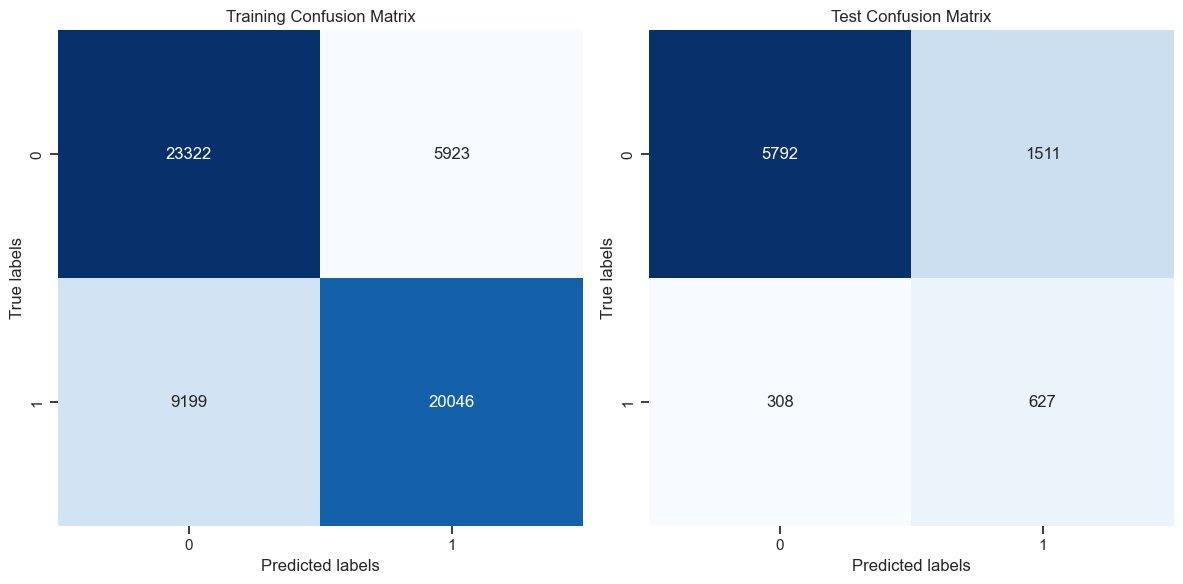

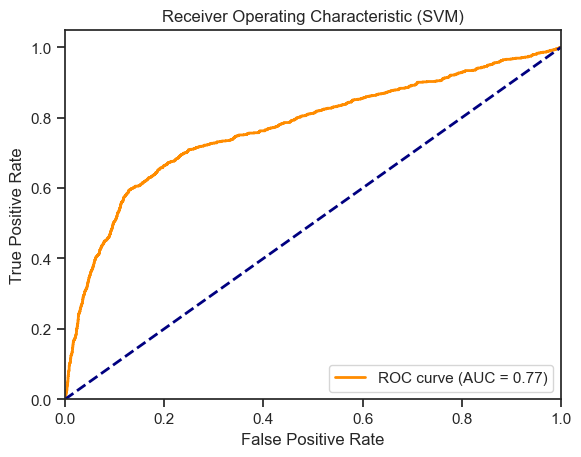

In [94]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical labels to binary labels
# label_encoder = LabelEncoder()
# y_test_binary = label_encoder.fit_transform(y_test)

# # Evaluate the SVM model
# train_pred = svm_model.predict(X_train_smote)
# test_pred = svm_model.predict(X_test_normalized)

# # Classification report
# print("Training Classification Report:")
# print(classification_report(y_train_smote, train_pred))
# print("Test Classification Report:")
# print(classification_report(y_test, test_pred))

# # Confusion matrix
# train_cm = confusion_matrix(y_train_smote, train_pred)
# test_cm = confusion_matrix(y_test, test_pred)

# # Plot confusion matrix
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Training Confusion Matrix")
# sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")

# plt.subplot(1, 2, 2)
# plt.title("Test Confusion Matrix")
# sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")

# plt.tight_layout()
# plt.show()

# # ROC Curve
# # Predict probabilities for SVM model
# y_train_prob_svm = svm_model.decision_function(X_train_normalized)
# y_test_prob_svm = svm_model.decision_function(X_test_normalized)

# # Map categorical labels to binary labels
# y_test_binary = y_test.replace({'no': 0, 'yes': 1})

# # Compute ROC curve and ROC area for SVM model
# fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binary, y_test_prob_svm)
# roc_auc_svm = auc(fpr_svm, tpr_svm)

# # Plot ROC curve for SVM model
# plt.figure()
# plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (SVM)')
# plt.legend(loc="lower right")
# plt.show()

Training Accuracy: 0.8874962063732929
Test Accuracy: 0.8849235251274581
Training Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.96      0.94     29245
         yes       0.50      0.29      0.37      3705

    accuracy                           0.89     32950
   macro avg       0.71      0.63      0.65     32950
weighted avg       0.87      0.89      0.87     32950

Test Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.96      0.94      7303
         yes       0.49      0.28      0.35       935

    accuracy                           0.88      8238
   macro avg       0.70      0.62      0.65      8238
weighted avg       0.86      0.88      0.87      8238



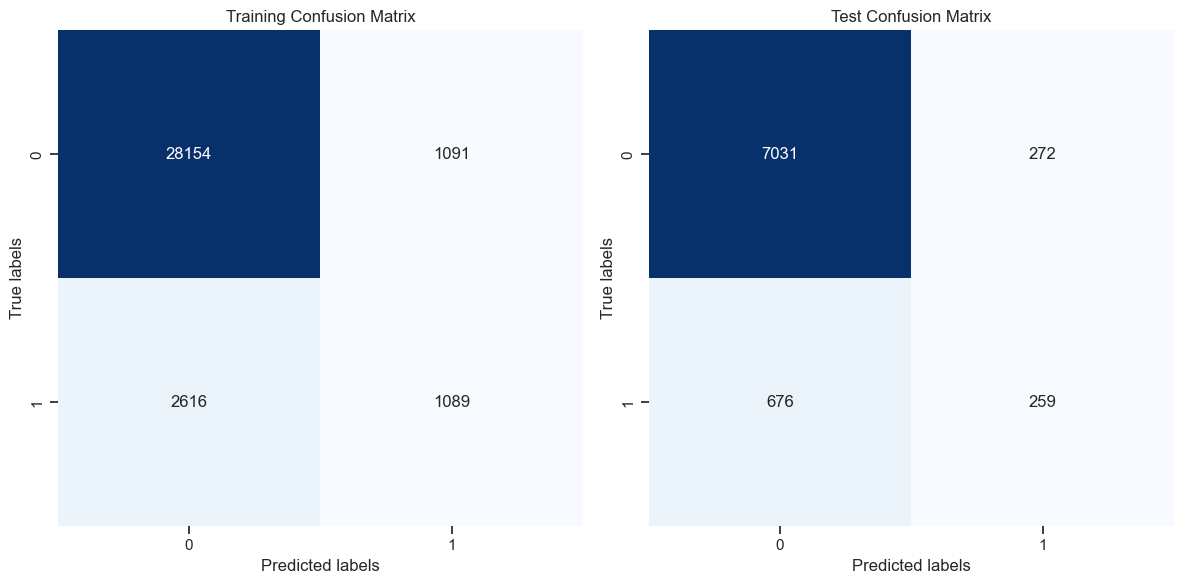

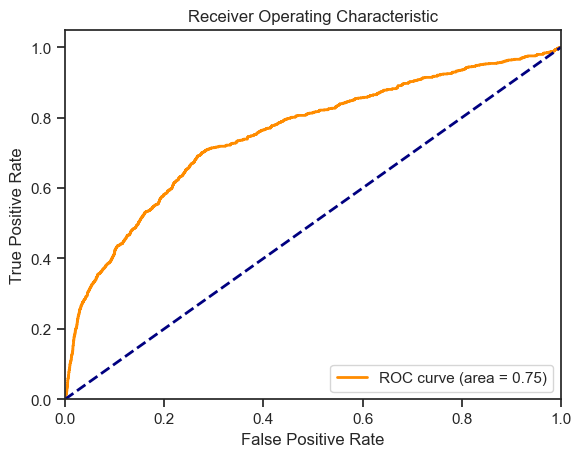

In [95]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import seaborn as sns


# # Define the MLP model using PyTorch
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, output_size)
#         self.relu = nn.ReLU()
#         self.softmax = nn.Softmax(dim=1)
    
#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         return self.softmax(x)

# # Encode target labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)    

# # Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train_encoded)

# # Convert SMOTE output to PyTorch tensors
# X_train_smote_tensor = torch.tensor(X_train_smote, dtype=torch.float32)
# y_train_smote_tensor = torch.tensor(y_train_smote, dtype=torch.long)

# # Define the model
# input_size = X_train_normalized.shape[1]
# hidden_size = 100
# output_size = len(label_encoder.classes_)
# mlp_model = MLP(input_size, hidden_size, output_size)

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# # Train the model with SMOTE data
# num_epochs = 10
# for epoch in range(num_epochs):
#     optimizer.zero_grad()
#     outputs = mlp_model(X_train_smote_tensor)
#     loss = criterion(outputs, y_train_smote_tensor)
#     loss.backward()
#     optimizer.step()

# # Evaluate the model
# with torch.no_grad():
#     train_outputs = mlp_model(X_train_tensor)
#     test_outputs = mlp_model(X_test_tensor)
#     train_predictions = torch.argmax(train_outputs, dim=1)
#     test_predictions = torch.argmax(test_outputs, dim=1)

# # Convert predictions back to original labels
# train_pred_labels = label_encoder.inverse_transform(train_predictions.numpy())
# test_pred_labels = label_encoder.inverse_transform(test_predictions.numpy())

# # Calculate accuracy
# train_accuracy = np.mean(y_train == train_pred_labels)
# test_accuracy = np.mean(y_test == test_pred_labels)

# print(f'Training Accuracy: {train_accuracy}')
# print(f'Test Accuracy: {test_accuracy}')

# # Print evaluation metrics
# print("Training Classification Report:")
# print(classification_report(y_train, train_pred_labels))
# print("Test Classification Report:")
# print(classification_report(y_test, test_pred_labels))

# # Confusion matrix
# train_cm = confusion_matrix(y_train, train_pred_labels)
# test_cm = confusion_matrix(y_test, test_pred_labels)

# # Plot confusion matrix
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Training Confusion Matrix")
# sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")

# plt.subplot(1, 2, 2)
# plt.title("Test Confusion Matrix")
# sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")

# plt.tight_layout()
# plt.show()

# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test_encoded, test_outputs[:, 1])
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


In [164]:
# Undersample the majority class
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_smote, y_train_smote)


In [165]:
# Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)


Training Accuracy: 0.7097965464181911
Test Accuracy: 0.8549405195435785
Training Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76     29245
           1       0.85      0.51      0.64     29245

    accuracy                           0.71     58490
   macro avg       0.75      0.71      0.70     58490
weighted avg       0.75      0.71      0.70     58490

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7303
           1       0.38      0.44      0.41       935

    accuracy                           0.85      8238
   macro avg       0.65      0.67      0.66      8238
weighted avg       0.86      0.85      0.86      8238



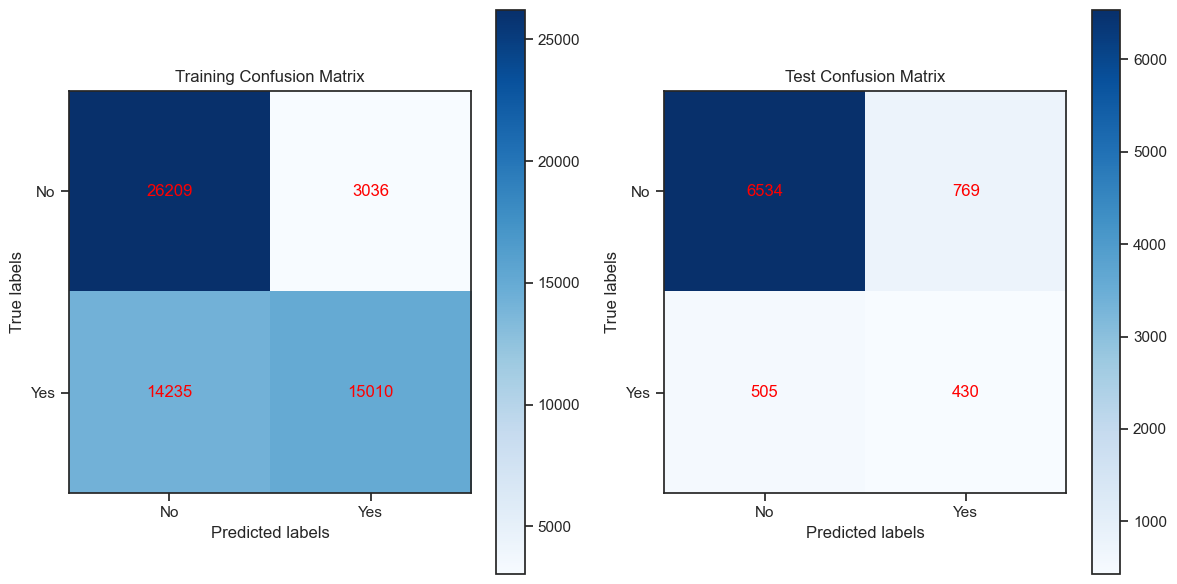

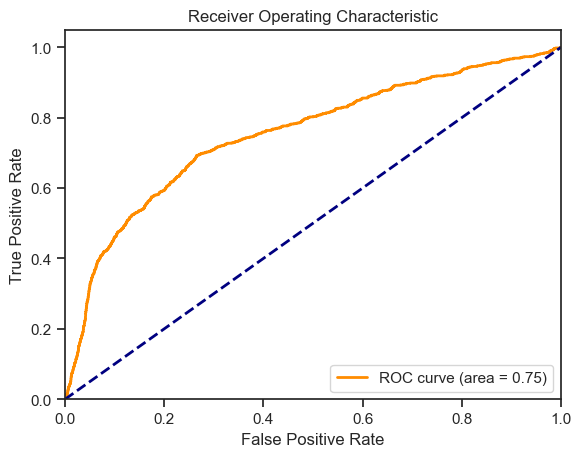

In [167]:

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define the MLP model using PyTorch
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Define the model
input_size = X_train_normalized.shape[1]
hidden_size = 100
output_size = len(np.unique(y_train_resampled))
mlp_model = MLP(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = mlp_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    train_outputs = mlp_model(X_train_tensor)
    test_outputs = mlp_model(X_test_tensor)

# Convert probabilities to predicted class
y_train_pred = torch.argmax(train_outputs, dim=1).numpy()
y_test_pred = torch.argmax(test_outputs, dim=1).numpy()

# Accuracy
train_accuracy = np.mean(y_train_pred == y_train_resampled)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


# Classification report
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


# Plot confusion matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training Confusion Matrix")
plt.imshow(train_cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(train_cm.shape[0]):
    for j in range(train_cm.shape[1]):
        plt.text(j, i, train_cm[i, j], ha='center', va='center', color='red')

plt.subplot(1, 2, 2)
plt.title("Test Confusion Matrix")
plt.imshow(test_cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(test_cm.shape[0]):
    for j in range(test_cm.shape[1]):
        plt.text(j, i, test_cm[i, j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_outputs[:, 1])
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [154]:
# from sklearn.neural_network import MLPClassifier

# # Instantiate MLP model
# mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)

# # Train the MLP model
# mlp_model.fit(X_train_normalized, y_train_resampled)


/Users/prachib/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)

Training Accuracy: 0.7860318003077449
Test Accuracy: 0.7499393056567127
Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     29245
           1       0.78      0.80      0.79     29245

    accuracy                           0.79     58490
   macro avg       0.79      0.79      0.79     58490
weighted avg       0.79      0.79      0.79     58490

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      7303
           1       0.25      0.61      0.36       935

    accuracy                           0.75      8238
   macro avg       0.60      0.69      0.60      8238
weighted avg       0.86      0.75      0.79      8238



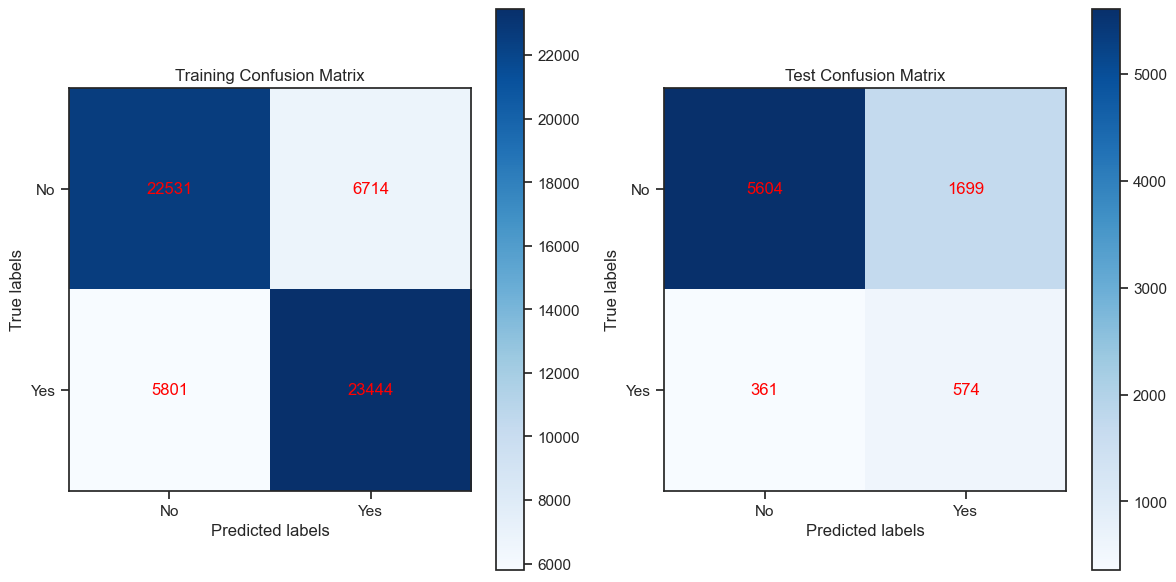

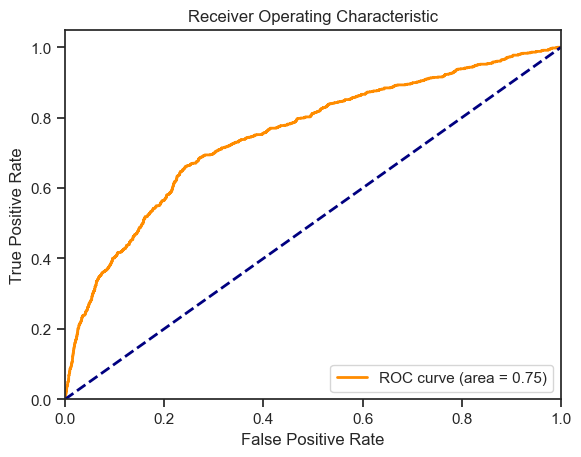

In [155]:
# from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc 
# import matplotlib.pyplot as plt

# # Predictions
# y_train_pred = mlp_model.predict(X_train_normalized)
# y_test_pred = mlp_model.predict(X_test_normalized)

# # Evaluate the MLP model
# train_accuracy = mlp_model.score(X_train_normalized, y_train_resampled)
# test_accuracy = mlp_model.score(X_test_normalized, y_test)

# # Print evaluation metrics
# print(f'Training Accuracy: {train_accuracy}')
# print(f'Test Accuracy: {test_accuracy}')
# print("Training Classification Report:")
# print(classification_report(y_train_resampled, y_train_pred))
# print("Test Classification Report:")
# print(classification_report(y_test, y_test_pred))

# # Confusion matrix
# train_cm = confusion_matrix(y_train_resampled, y_train_pred)
# test_cm = confusion_matrix(y_test, y_test_pred)

# # Plot confusion matrix
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Training Confusion Matrix")
# plt.imshow(train_cm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(train_cm.shape[0]):
#     for j in range(train_cm.shape[1]):
#         plt.text(j, i, train_cm[i, j], ha='center', va='center', color='red')

# plt.subplot(1, 2, 2)
# plt.title("Test Confusion Matrix")
# plt.imshow(test_cm, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.yticks([0, 1], ['No', 'Yes'])
# for i in range(test_cm.shape[0]):
#     for j in range(test_cm.shape[1]):
#         plt.text(j, i, test_cm[i, j], ha='center', va='center', color='red')

# plt.tight_layout()
# plt.show()

# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test_encoded, test_outputs[:, 1])
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


Training Accuracy: 0.732723542485895
Test Accuracy: 0.8318766690944404
Training Classification Report:
              precision    recall  f1-score   support

          no       0.68      0.87      0.76     29245
         yes       0.82      0.60      0.69     29245

    accuracy                           0.73     58490
   macro avg       0.75      0.73      0.73     58490
weighted avg       0.75      0.73      0.73     58490

Test Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.87      0.90      7303
         yes       0.35      0.57      0.43       935

    accuracy                           0.83      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.87      0.83      0.85      8238



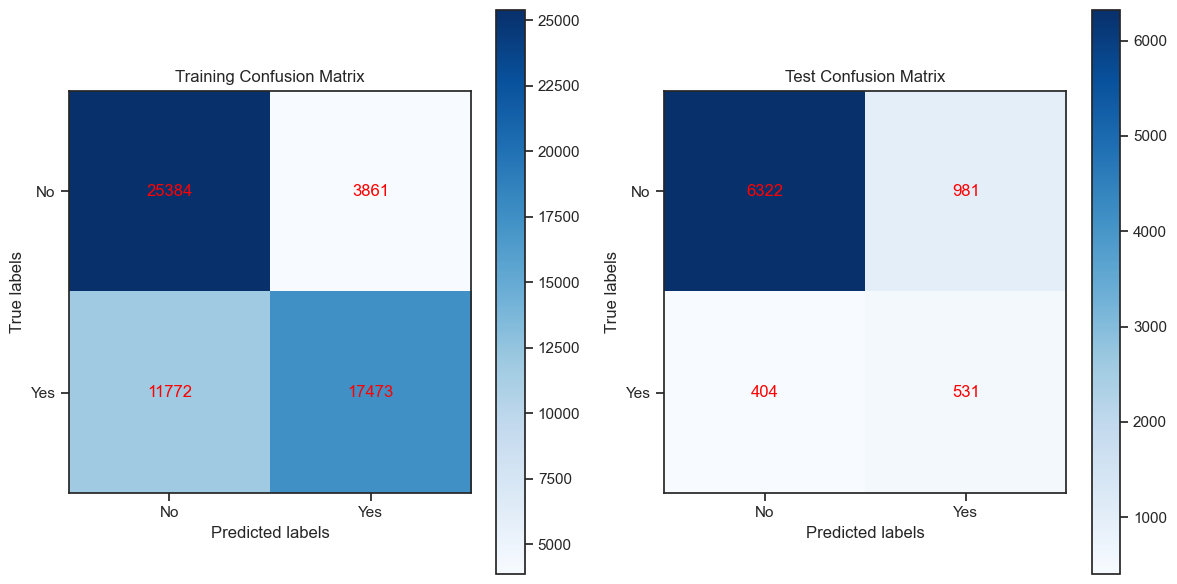

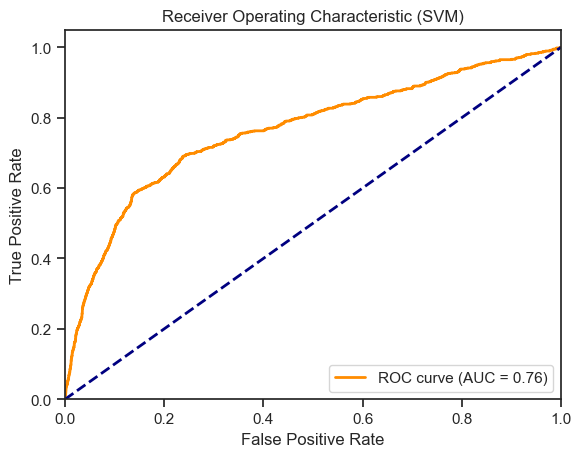

In [128]:
# Instantiate SVM model
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train_normalized, y_train_resampled)

# Predictions
y_train_pred = svm_model.predict(X_train_normalized)
y_test_pred = svm_model.predict(X_test_normalized)

# Evaluate the SVM model
train_accuracy = svm_model.score(X_train_normalized, y_train_resampled)
test_accuracy = svm_model.score(X_test_normalized, y_test)

# Print evaluation metrics
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
train_cm = confusion_matrix(y_train_resampled, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training Confusion Matrix")
plt.imshow(train_cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(train_cm.shape[0]):
    for j in range(train_cm.shape[1]):
        plt.text(j, i, train_cm[i, j], ha='center', va='center', color='red')

plt.subplot(1, 2, 2)
plt.title("Test Confusion Matrix")
plt.imshow(test_cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(test_cm.shape[0]):
    for j in range(test_cm.shape[1]):
        plt.text(j, i, test_cm[i, j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()
# ROC Curve
# Predict probabilities for SVM model
y_train_prob_svm = svm_model.decision_function(X_train_normalized)
y_test_prob_svm = svm_model.decision_function(X_test_normalized)

# Map categorical labels to binary labels
y_test_binary = y_test.replace({'no': 0, 'yes': 1})

# Compute ROC curve and ROC area for SVM model
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binary, y_test_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM model
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()